In [1]:
# !pip install twint
# !pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
import twint # To scrape through Twitter for data
import nest_asyncio # To sync twint library properly
import pandas as pd # To build datasets
import matplotlib.pyplot as plt # To build visualizations
import seaborn as sns # To also build visualizations
import re # regular expressions library, mainly for cleaning up punctuations
import spacy
nest_asyncio.apply()

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000
%matplotlib inline

In [2]:
# Configure
config = twint.Config()
config.Search = "stimulus"
config.Limit = 10000
config.Until = "2021-03-12"
config.Store_csv = True # save as csv file
config.Output = "TweetFile.csv" # csv name

twint.run.Search(config)

1370162607827550210 2021-03-11 15:59:56 -0700 <candidate7153> Biden administration set to issue $1,400 stimulus payments  https://t.co/TuTLXhAXPs #DC
1370162588525359105 2021-03-11 15:59:52 -0700 <DudeNunez> @DrAPearson @Lobodor @yedoye_ to-go box 😭😭😭😭😭😭
1370162578266161155 2021-03-11 15:59:49 -0700 <FloLake> European Central Bank to Step Up Stimulus to Keep Borrowing Costs Low  https://t.co/yQDoqdjrBw  https://t.co/YNMymQyIHU
1370162569952948224 2021-03-11 15:59:47 -0700 <ShadeandSun> @brad_polumbo So what you're saying is the debt Trump accumulated is inevitably going to increase our taxes.  Make sure you blame Trump if this happens (okay?).  Also, stimulus can save/create jobs which in turn increases productivity which in turn increases revenue (refer to Obama bailouts).
1370162560624910336 2021-03-11 15:59:45 -0700 <KelseySpiese> Hoping that stimulus check hits the account this weekend 🤞🏼 dam water bill and electric bill are adding up real quick. 😬
1370162545072484361 2021-03-11 15

1370161931626156032 2021-03-11 15:57:15 -0700 <MdxlivewireMy> @HRBlockNews Will there be any issues this time with sending the stimulus?
1370161931152019459 2021-03-11 15:57:15 -0700 <BelYoureh> Biden signed the #AmericanRescuePlan without holding it up for vanity, and he will send the stimulus checks without putting his name on them. Class act. I'm so happy the former clown isn't in the White House anymore.
1370161926504857611 2021-03-11 15:57:14 -0700 <TCarlisleArt4> Susan Collins is so full of shit. Bipartisan, huh? That’s why you voted to acquit Trump TWICE and voted against the $1.9 trillion stimulus bill that plenty of GOP voters supported?
1370161920653684738 2021-03-11 15:57:12 -0700 <Tim95319030> @QuitLyingDummy @WhiteHouse @VP Still waiting on 2019 tax returns never mind a stimulus check fam lol
1370161920364449794 2021-03-11 15:57:12 -0700 <Meghanrobinsonn> This next stimulus check I’m most definitely fucking it off 😭😭 I saved the last 2 I deserve it
1370161899195752455 2021

1370161223870918664 2021-03-11 15:54:26 -0700 <a_Blu_J> If you too good for your stimulus, then I hope you are good enough to donate to a single mother and her child in need of transportation and a home:  Cashapp $abluj Venmo @a_Blu_J  PayPal jrlh2017@gmail Zelle DM for #  Thank you for your generous donations! 💙
1370161221824098304 2021-03-11 15:54:26 -0700 <MarcusCev> @Verzache_ Finally now people are starting to see the stimulus check bullshit lol. The stimulus were ass even with trump at the helm, it’s gotta do with greed
1370161217956896769 2021-03-11 15:54:25 -0700 <MrOsaze> @theking4mayor @RobDenBleyker If it takes this administration to release a stimulus longer than the previous than you know win.
1370161214039359498 2021-03-11 15:54:24 -0700 <Grimmalkin4> @POTUS Got my vaccine today, the stimulus check is gonna catch me up on my mortgage payment. Thank you, Mr. President.
1370161209786445826 2021-03-11 15:54:23 -0700 <r0wlets> i hear one mention of the stimulus check and then

1370160712568438786 2021-03-11 15:52:24 -0700 <pensudar> @MerakiMars Stimulus passed today so there’s that!
1370160712056639489 2021-03-11 15:52:24 -0700 <WasThatNowThis> @marcorubio Illegals don't get stimulus checks chin-nut.
1370160707900162049 2021-03-11 15:52:23 -0700 <rpwpb> @thehill Yeah, right Jordan. The American people care about the stimulus check, the vaccine, paying rent and putting food on the table; not those made-up GOP "issues".
1370160705891143686 2021-03-11 15:52:23 -0700 <FCrews_23> I’m curious how taxes in 2021 gonna be with all these stimulus checks.. I like the money but if you gonna tax me for it you can have it lol
1370160705354170369 2021-03-11 15:52:23 -0700 <KarenDSouza4> What the federal stimulus bill means to California's child care sector  https://t.co/m5sOkYs49J via @edsource @ahardyMPA17 @childcaresf
1370160694381965313 2021-03-11 15:52:20 -0700 <zurnic> @marcorubio You know that illegal immigrants don't have social security numbers and can't receive th

1370159967496454144 2021-03-11 15:49:27 -0700 <aremtula1> #Trumpanzee @SenRickScott was ok to spend other people's money when he helped rob the treasury to give billionaires tax breaks. But implores states to ‘reject and return’ stimulus money for the needy.  https://t.co/MrcSgSwvF9
1370159957857824769 2021-03-11 15:49:24 -0700 <1122Blessed> Biden signed the stimulus pkg checks could start as early as this weekend according to Jen Psaki but IRS says by next week Thursday.  We are NOT getting this stimulus because of Biden, this was Trumo...Biden lowered it to $1400 &amp; cut out over 12ml ppl who previously received it.
1370159957249773576 2021-03-11 15:49:24 -0700 <kindofabitcch> @Isplom @KiaSpeaks Lol, no. It’s an economic stimulus package directed at improving the economy. By giving money to the people, the influx of spending into our economy will increase. Because people have $ to spend. It doesn’t matter how it’s spent. It’s stimulating the economy ..the original point
13701599540

1370159492122427392 2021-03-11 15:47:33 -0700 <KBNovaStarr> This dude voted AGAINST the stimulus, but is trying to take credit.
1370159485147250689 2021-03-11 15:47:32 -0700 <FinanzLinksAsia> ▶ 📊 📈 THAILAND Consumer confidence index perks up: Consumer sentiment picked up for the first time in three months in February, boosted by the government's economic stimulus measures and the promise of mass distribution of Covid-19 vaccines.  https://t.co/LOrqoKQTC6
1370159481074556929 2021-03-11 15:47:31 -0700 <chrisnovell> @marcorubio If stimulus checks are being paid out based on SSN, how will and “illegal” immigrant get one? Stop pedaling hate!
1370159478713286664 2021-03-11 15:47:30 -0700 <NigerianStef> Moneybagg Jo coming through with that stimulus lmao I love twitter.
1370159474867060736 2021-03-11 15:47:29 -0700 <kms_dot_com> Govt was too liberal with the stimulus checks. This is evidenced by the spoiled girl one table over who is proudly exclaiming she’s gonna buy a Gucci bag with it 😐
13

1370158680927244288 2021-03-11 15:44:20 -0700 <wildcherryfla> So to everyone celebrating the 1400 stimulus just know all federal employees are getting 21000!
1370158671972417537 2021-03-11 15:44:18 -0700 <DisneyCityFC> @Lions0607 No Republicans were crying when Trump sent Stimulus checks to dead people
1370158668914814977 2021-03-11 15:44:17 -0700 <Caseyyy727> While doing my taxes I found out these mfers owe me the last 2 stimulus LMFAOOO thanks for the cash @POTUS I’m rich now
1370158666389807109 2021-03-11 15:44:17 -0700 <laparka440> Mr. President, what about the detained migrant children and how come only some on the US are eligible for that stimulus check you planned in distributing?  @JoeBiden @POTUS #JoeBiden #Urgent #Democrats #Promises
1370158665295073288 2021-03-11 15:44:16 -0700 <wakemark69> 'Shame on them': Republican voters attack GOP members for refusing to support stimulus they need  https://t.co/E5lGZ5DiDw
1370158637075812353 2021-03-11 15:44:10 -0700 <iamnotatwit> I'm d

1370157996370579456 2021-03-11 15:41:37 -0700 <luapers> @kylegriffin1 Really?  Just 49 and 62?  The other 51 &amp; 38 do not approve just to own the libs?  In case they need to know, those libs got them those $1400 stimulus checks.
1370157993585745922 2021-03-11 15:41:36 -0700 <Padap1113> @FoxNews OMG! What is with you? #DonaldJTrump did not do AM news briefings &amp; was basically AWOL after the election. @JoeBiden is busy  w/vaccines, a stimulus pkg, &amp; dealing w/the stuff #Trump failed at. Find something else to complain about!
1370157986124075008 2021-03-11 15:41:34 -0700 <billyarnie> @KTLA I thought Biden &amp; the Democrats promised $2,000 each... Both parties keep trying to Buy Our Votes with "stimulus checks". It was OUR tax money In The First Place!
1370157979392114693 2021-03-11 15:41:33 -0700 <Women4UBI> Did you know that Oregon is taxing the stimulus?
1370157966897348611 2021-03-11 15:41:30 -0700 <FearTre> Nah this nigga got a stimulus check marketing scheme.
13701579624

1370157741981925377 2021-03-11 15:40:36 -0700 <brubrew> My mom is hoping for two checks this round of stimulus.  Gently reminded her that NO REPUBLICANS voted for them. So if she gets them she needs to understand where they're from.
1370157729688416256 2021-03-11 15:40:33 -0700 <jpjones7031> Republican leader Kevin McCarthy says voters overwhelmingly support Biden's stimulus bill because they don't understand it  https://t.co/qF8Q5c9Z57, McCarthy is saying people are dumb?
1370157729059282946 2021-03-11 15:40:33 -0700 <FineFelon> Stimulus checks are designed to do not a damn thing we need to rob these rich YT folks 😘
1370157726328745985 2021-03-11 15:40:32 -0700 <realDailyWire> Kennedy On Stimulus: Calling It ‘A Coronavirus Bill’ Is Like Thinking ‘The Stripper Really Likes You’  https://t.co/X3e9omJA2b  https://t.co/x5AA5wBkBc
1370157693646741505 2021-03-11 15:40:25 -0700 <itsleenduh> I see some college dependents saying their parents aren’t gonna give them their stimulus money &amp; I

1370157353710931971 2021-03-11 15:39:04 -0700 <Dosumi47> Stimulus checks: $1,400 payments could come as early as this weekend  https://t.co/e8AZIxAKV9 via @Yahoo  Here it comes just wait to see what it cost you.
1370157353463652352 2021-03-11 15:39:04 -0700 <jhudd2> @Sites4Congress @Jim_Jordan Pelosi wouldn’t allow Trump to give $2,000 stimulus check to the American ppl. Racist democrat ruin everything
1370157345133588481 2021-03-11 15:39:02 -0700 <Nveex3> I love filing separate because I will be spending all my stimulus on bs I don’t need 😊 lol jk I’m buying stuff for my baby’s birthday party probably
1370157334190813184 2021-03-11 15:38:59 -0700 <TariqMuziq> Does @turbotax know the #stimulus is coming?
1370157332802510850 2021-03-11 15:38:59 -0700 <CaliforniaGlobe> Los Angeles to Receive $1.35 Billion From Federal Stimulus Package -  https://t.co/eIiIt1q44S  https://t.co/fHU2prFDRs
1370157329480519687 2021-03-11 15:38:58 -0700 <raddadbodTV> @JohnHeezy It’s conflicting man. Like yes p

1370156982456479744 2021-03-11 15:37:35 -0700 <YKJimma> Imma fuck around and end up gettin my stimulus tomar lol
1370156972624912384 2021-03-11 15:37:33 -0700 <Jason_Zwibel> Thousands of Airline Jobs Are Saved in Biden’s Stimulus Bill: Live Updates  https://t.co/HTIIKCUIIW  https://t.co/VdVOrt18Gz
1370156970913718274 2021-03-11 15:37:32 -0700 <MilesJacobs15> @aubrey_huff How was Trumps stimulus package?
1370156970024566786 2021-03-11 15:37:32 -0700 <GranddadMarty> @TitusNation @RaeRaeBradley @CombustionLive I hope I get the stimulus check in time so I can see this one and help some of my favorite comics on the planet
1370156970011942921 2021-03-11 15:37:32 -0700 <cmchugh126> I thought the stimulus checks were supposed to be 1400 per adult plus 500 for dependents. My family of four, in a tax year when my wife was out of work, somehow only received $2400 total. I am super confused.
1370156941700427779 2021-03-11 15:37:25 -0700 <mysticfeys> well i know what my stimulus is going towards
13

1370156111396024322 2021-03-11 15:34:07 -0700 <MJoyce2625> It's about damn time. "Democrats’ messaging shifts as they pass Biden stimulus bill: From economic crisis rescue to poverty relief"  https://t.co/Ms8CGsVbKR
1370156109613400071 2021-03-11 15:34:07 -0700 <ImperialFPO> @chgreen51 @davidmweissman @kayleighmcenany Stimulus package? Covid vaccines? Re introducing our country to the world? Compassion? A plan for our future? Not golfing? Not tweeting? Not on Putin's payroll?
1370156096971628546 2021-03-11 15:34:04 -0700 <dougie944> @high5racing @awealthofcs As soon as the restaurants and travel open back up.... even without the stimulus.
1370156093909925897 2021-03-11 15:34:03 -0700 <LeaderSpac> @VPM824 Wish I had added a large position at 10.30 this AM as I was 100% cash... now 75% cash waiting for weakness after stimulus hype but did not want to miss any pending news!
1370156086158888963 2021-03-11 15:34:01 -0700 <lukehagen> Curious to any parents who’ve received stimulus money: Hav

1370155532951097346 2021-03-11 15:31:49 -0700 <CraigDMorrison> Anyone see that $1400 stimulus in their account yet?
1370155520695341056 2021-03-11 15:31:47 -0700 <oilgasunicorn> @GenZReviewer Because economic principles don’t apply anymore and this is a repeat of 07-08 for different reasons but the end result will be the same. 10% mortgage delinquencies delayed by legislation and stimulus. Printing money. History repeats...
1370155520145960962 2021-03-11 15:31:46 -0700 <jtshadow92> Can the new stimulus check cover lipo?
1370155518438744064 2021-03-11 15:31:46 -0700 <HFI_Research> It's A Bit Silly To Think There's No Inflation Risk Arising From More Stimulus  #OOTT   https://t.co/2R4tYcVYSp
1370155518233354248 2021-03-11 15:31:46 -0700 <dreamerdoer27> @SenTedCruz let’s see: much needed stimulus checks, help for reopening schools, help with vaccines, thousands keeping jobs...US now has 1 in 4 adults fully vaccinated. you &amp; your cronies have flown to cancun, pitches fits about dr. seu

1370155103852716033 2021-03-11 15:30:07 -0700 <akbarth3great> Balance of Power: CT Gov. Lamont on Stimulus Impact (Podcast)  https://t.co/KhbrJqyUue
1370155102879711234 2021-03-11 15:30:07 -0700 <mlnangalama> via @PerilofAfrica Balance of Power: TN Sen. Marsha Blackburn, Stimulus (Podcast)  https://t.co/MfcbRy7brS
1370155102321872899 2021-03-11 15:30:07 -0700 <econmiller> Biden Stimulus Plan to Aid Michigan Local Finances and Economies - Center for Local Government Finance &amp; Policy  https://t.co/ydCUjOIWqZ
1370155101763952640 2021-03-11 15:30:07 -0700 <mlnangalama> via @PerilofAfrica Balance of Power: CT Gov. Lamont on Stimulus Impact (Podcast)  https://t.co/SngABvoTc0
1370155101684297728 2021-03-11 15:30:07 -0700 <hplarc> Congress Closes Loophole That Made Veterans a Target of For-Proft Schools: The new economic stimulus package makes a tiny change that military veterans pushed for in hopes of stemming aggressive recruiting tactics.  https://t.co/oRXEr5iV5K #ForProfitSchools #Vete

1370154696887959553 2021-03-11 15:28:30 -0700 <realmykefreeman> Send me my damn stimulus!
1370154696837595138 2021-03-11 15:28:30 -0700 <aldoluvs> Beanstox Live: Your $1,400 Stimulus Check and More with Kevin O'Leary an...  https://t.co/eXlWEdQJFl via @YouTube
1370154692269989894 2021-03-11 15:28:29 -0700 <MenshevikM> imagine living on a diet of right wing conspiracy media and going from "Joe Biden is a satanic pedophile who rigged an election on behalf of a vampire cabal" to "the stimulus might cause interest rates to rise" in the span of a month
1370154691506675725 2021-03-11 15:28:29 -0700 <cgwegene> @politvidchannel Was all of the sudden Senator Fiscally Conservative saying anything during the unpaid $2 trillion tax cuts or during the two Trump-era stimulus’s?  Probably not.
1370154686741889025 2021-03-11 15:28:28 -0700 <NoreneD39766667> @GOPLeader so you feel Ppl don't understand the stimulus?  Well over 55% GOP voters are happy they will stay in their homes &amp; can feed their k

1370154019939872772 2021-03-11 15:25:49 -0700 <postpolitics> The Trailer: What the stimulus means for the next campaign  https://t.co/mk420LwG1M
1370154017511374849 2021-03-11 15:25:48 -0700 <smooth__slime> HOUSTON WOOOOOOOOW!!!!!
1370154015116382210 2021-03-11 15:25:48 -0700 <wrs_willoughby> @business The sooner the stimulus money gets into circulation the sooner small businesses recover and start hiring again, unemp and SNAP exp go down and cities/states start collecting sales/income taxes they desperately need All due to this bill and now over 2 million doses/day vaccinated
1370154013212086275 2021-03-11 15:25:47 -0700 <SleeperHODL> @TropicalSauce05 @Fidelity President Biden just passed the 32.7 million #Bitcoin stimulus bill.  https://t.co/QLXf78srZQ
1370153973320146945 2021-03-11 15:25:38 -0700 <dubvNOW> Westmoreland County preps for expected $107 million stimulus windfall  https://t.co/UghrcqQrvK  https://t.co/IUcCNHsr0Y
1370153967548784646 2021-03-11 15:25:36 -0700 <JaneDrewes> 

1370153499082776578 2021-03-11 15:23:45 -0700 <CochanelXo> Folks done started again trying to tell people what to do with they stimulus 😒 likeeeeeee....Is that not old yet?
1370153488995389445 2021-03-11 15:23:42 -0700 <OppositeInvict2> If you are a gig worker you need to read this !!!!!!!!!!  Per the new stimulus bill, third party network transactions must now be reported to the IRS when the transaction exceeds 600$. Previously this was only reported to the IRS when you exceeded 20,000$ and 200 transactions.
1370153478836785155 2021-03-11 15:23:40 -0700 <BrittanyKatB> @IRSnews Nobody thinks calling IRS will really accomplish shit but we need the money and daily feel the need to check into a sketchy ass situation that you all could clear up for us with explanation on what’s really happened to the early filers . No stimulus ever and no refund - bullshit
1370153477217918980 2021-03-11 15:23:39 -0700 <MichelleZink> The child tax credit in the stimulus bill is revolutionary for parents, mo

1370152624599793667 2021-03-11 15:20:16 -0700 <hmccdc> @RepJohnJoyce Put your vote where your 👄 is. You care so much but vote no to the stimulus bill which would offer more sites. Still don’t care about YOUR constituents do you.
1370152610993426432 2021-03-11 15:20:13 -0700 <Linda49681927> Excuse me idiot I didn’t get a stimulus check on your body yet! But I did get two from Trump!
1370152599115104257 2021-03-11 15:20:10 -0700 <LabworksVapes> @jerbsod @AlexWodak @LegaliseVaping @drjoesDIYhealth I would also like to question what part of the Government Stimulus was granted?
1370152591028543491 2021-03-11 15:20:08 -0700 <BabeRisko> @TPPatriots I wonder how many of you Tea Party “Patriots” are gonna gladly take the stimulus check from your Daddy?
1370152586033123329 2021-03-11 15:20:07 -0700 <Mahottie> The best thing about this tweet is that you could be talking about GoT or the stimulus checks being short
1370152585450156033 2021-03-11 15:20:07 -0700 <tankiebot69420> It is Thursday March

1370152185246416909 2021-03-11 15:18:31 -0700 <Lilnicjac> I’ve been in a good mood all day and then my mom texted me saying I finally get stimulus money and y’all I’m screaming
1370152184348868612 2021-03-11 15:18:31 -0700 <KenyaNoCountry> What’s y’all beef with women wanting to spend they stimulus on hair and shit. Bitch the stimulus is to STIMULATE THE ECONOMY! If they wanna go spend that shit on hair, 🗣why tf do y’all give AF???
1370152166187442180 2021-03-11 15:18:27 -0700 <TeamTurboTax> @darryLk29 Hello there, We are doing everything we can to make sure eligible taxpayers get their stimulus checks. We have been working closely with the IRS and have confirmed with them that they have accurate banking information for all TurboTax filers. -Chelsie
1370152159464067072 2021-03-11 15:18:25 -0700 <Lvl62Charizard> Trump would have the wildest tweets right now about that stimulus if he wasn't banned
1370152145362825220 2021-03-11 15:18:22 -0700 <FrankQcwriter> @BlackKnight10k No. I need th

1370151465067675659 2021-03-11 15:15:40 -0700 <Sauc3__> I want that stimulus this time.
1370151463406739468 2021-03-11 15:15:39 -0700 <My_JPA> JUST IN: Stimulus payments will start going out this weekend  https://t.co/kZCNnLjidJ  https://t.co/QD2pGTdyUZ
1370151462827855874 2021-03-11 15:15:39 -0700 <RichardScottWa3> @turbotax Will we have to wait again for yall to get us our money without a giant fiasco like with the last stimulus?
1370151462538514432 2021-03-11 15:15:39 -0700 <rweingarten> "...middle-income families, those making $51,000 to $91,000 per year, will see their after-tax income rise by 5.5 percent as a result of the tax changes and stimulus payments in the legislation."   https://t.co/9P26HmcqEt
1370151461145899009 2021-03-11 15:15:39 -0700 <King_TR_Kalama> Life is better than it’s ever been scheduling stimulus meetings with the president
1370151443022426117 2021-03-11 15:15:34 -0700 <590KQNT> President Joe Biden Signs Coronavirus Stimulus Bill  https://t.co/LRvuZNtIiL  ht

1370150948555874310 2021-03-11 15:13:36 -0700 <Burleythecat> Republican leader Kevin McCarthy says voters overwhelmingly support Biden's stimulus bill because they don't understand it  https://t.co/cbt6BqpBck   Yet the Rs can't tell us the specifics on what's so evil about the bill...
1370150948551630848 2021-03-11 15:13:36 -0700 <TeamTurboTax> @FourRosesBar Hello, does it say what error message? For some, it is line 30 after filing and the IRS is simply adjusting returns based on what they have in their records for stimulus' received. -Jessica
1370150939093516288 2021-03-11 15:13:34 -0700 <Iluvmybacons> @CNNNewsource American people want their jobs back. Not measly "stimulus bills" that are an excuse for Dems to pocket and redirect 90% to things that have absolutely nothing to do with the financially hurting citizens. Enough is enough.
1370150936161644544 2021-03-11 15:13:34 -0700 <akbarth3great> Stimulus, Vaccines, Beeple: Your Thursday Evening Briefing  https://t.co/cOmjjKuhGg
13701

1370150399248789505 2021-03-11 15:11:26 -0700 <jasproses> making a list of dumb shit i’m going to buy when my stimulus check drops bc the stuff like bills &amp; new clothes &amp; some household appliances are obvious. piercings, a maid outfit, a sword, etc. well. that’s where things get interesting
1370150397176901633 2021-03-11 15:11:25 -0700 <QuitaB_> They said if you file your taxes within the next day you can get the stimulus by direct deposit.. Yea imma go ahead &amp; file my shit lol
1370150392386912259 2021-03-11 15:11:24 -0700 <AlmiraDemetz> When will we get stimulus checks? Biden signs COVID relief package today, bringing $1,400 payments to bank accounts starting this weekend - ABC7 Los Angeles  https://t.co/Ytt3JwHuqg
1370150390231040002 2021-03-11 15:11:23 -0700 <David_L_Cullen> President Biden signs $1.9 trillion #coronastimulus into law-- some could see stimulus paymentsas soon as this weekend  https://t.co/z9ZeI6SCQV
1370150369389649922 2021-03-11 15:11:18 -0700 <canada4n

1370149805134020608 2021-03-11 15:09:04 -0700 <bdollabills> Done deal: Biden signs $1.9T stimulus with billions for real estate  https://t.co/er6CuzzR7P
1370149788105109504 2021-03-11 15:09:00 -0700 <jpcrowe_crowe> Strange how no Republican voted for the Stimulus but claim to be responsible for it. Guess that means Biden can claim responsibility for gains in the stock market using the same argument.
1370149783537598465 2021-03-11 15:08:59 -0700 <Greeninthemiddl> What should I name my stimulus corgi  A) Ruby B) Juniper C) Bowie D) Other tell me in comments
1370149768945668102 2021-03-11 15:08:55 -0700 <LevineJonathan> MTA calls off wage freeze after Biden signs COVID stimulus  https://t.co/PPdfpqT5BK
1370149764168364036 2021-03-11 15:08:54 -0700 <TaxAct> @LadyMookie2018 @ShingenTekeda @LadyMookie2018 We are working closely with the IRS to ensure the mishap that happened with the IRS doesn't happen again. We will do as much as we can but we hold no rank over the IRS and are not in contro

1370149382826430465 2021-03-11 15:07:23 -0700 <SarahArkell> @HolyCowCrap12 @greta As a republican I have no issue with the poor getting stimulus absolutely deserve it but a child molester serving 15 years nope.  I wanted to see bigger amount of direct payments because that would help more then just sending millions to cities who won’t administer it correctly.
1370149373196242953 2021-03-11 15:07:21 -0700 <J_Gib> This also begs the question, does Rick Scott actually know what the true intent of a stimulus package is?
1370149372281823233 2021-03-11 15:07:21 -0700 <pat_palazzo> It’s a good day when sleepy joe wakes up to sign the stimulus bill
1370149367504637955 2021-03-11 15:07:20 -0700 <lumino_zero> @rickyyyF10 @Complex @IRSnews If you haven't gotten the last $600 stimulus, there is a section on your taxes to indicate that.  If you haven't gotten it, it will be added onto your tax refund.
1370149363960442883 2021-03-11 15:07:19 -0700 <Junkyard_Dawwg> @Happygirldeb1 You for real? Sleepy

1370149168132415490 2021-03-11 15:06:32 -0700 <ccmiel> How America’s blockbuster stimulus affects the dollar  https://t.co/hdZIzRadlr
1370149163732774912 2021-03-11 15:06:31 -0700 <upstractcom> NewsWatch: When will you get your $1,400 stimulus check? White House says some payments will arrive ‘as early as this weekend’ #whitehouse #newswatch  https://t.co/5FEPy3ZENi
1370149156329689091 2021-03-11 15:06:29 -0700 <gratefulmann> @BethLynch2020 I think it's mostly based on the family tax credit + stimulus checks   https://t.co/HpNXomKzH8
1370149151959302146 2021-03-11 15:06:28 -0700 <_Carja> Biden signs $1.9 trillion stimulus bill into law on U.S. lockdown anniversary  https://t.co/UdkJdUikzD via @YouTube
1370149143000272899 2021-03-11 15:06:26 -0700 <iTechNewzz> 5 Things You Must Know About Biden Stimulus if You're Unemployed  https://t.co/b5UYR5yoHg
1370149141083516931 2021-03-11 15:06:26 -0700 <SeeNewsNet> #Business :: Dow Jones, S&amp;P Indices Hit Record Highs Thursday Morning on Stim

1370148875265249284 2021-03-11 15:05:22 -0700 <HarveyJ52698618> @dstiddypop43 I'm using my stimulus money to buy a descrambler which will get me free cable.   The descrambler is high tech &amp; expensive  But who cares, Biden is paying for it  FREE CABLE , HBO, SHOWTIME, &amp; MORE!!!!
1370148868617297922 2021-03-11 15:05:21 -0700 <philthygrit> If my mom don’t leave me TF alone about this damn stimulus. Ima stimulate her ass alright.
1370148866855739394 2021-03-11 15:05:20 -0700 <voter1vote> Rick Scott Begs States To Reject That Sweet Stimulus Cash, But Florida @GovRonDeSantis  Wants More | @TPM   https://t.co/r2zAFh9Wb9
1370148855115829249 2021-03-11 15:05:17 -0700 <divdebtdelight> @gobank So, do you plan to “bounce back” this stimulus check too? Or are you going to use my stimulus check to cover the mysterious “negative balance”?
1370148853907812356 2021-03-11 15:05:17 -0700 <haydeemrcd> Give me your stimulus check
1370148848807653379 2021-03-11 15:05:16 -0700 <PeterHansenEcon> My ma

1370148681161306114 2021-03-11 15:04:36 -0700 <RingJames_6> @snicklebritz @pantsbobsponge @hover389 @CNBCnow @thesheetztweetz Then give it to someone then or better yet spend it on local companies since you know, that's the main point of it. To stimulus the economy
1370148676555976704 2021-03-11 15:04:35 -0700 <tobzillaortobz> Y’all entering the seafood restaurants after Moneybagg Joe signed the stimulus check bill  https://t.co/RWSr7DWHfa
1370148675947757570 2021-03-11 15:04:35 -0700 <SpaceEichYT> Gonna buy new xbox when stimulus
1370148672806207497 2021-03-11 15:04:34 -0700 <Sapuis1> @NUKELAIR_ U annoying lmao
1370148663629131776 2021-03-11 15:04:32 -0700 <Millionaire2000> @BarbraStreisand Tell all the Republicans that did not support the bill to send their stimulus money back to the US Treasury payable towards the national debt they are always talking about that they help create by their excessive spending AND lining their wealthy pockets.
1370148659279626244 2021-03-11 15:04:31 -07

1370148371667714048 2021-03-11 15:03:22 -0700 <kausmickey> DICONNECT: Biden says his stimulus bill gives "people in this nation, working people... people who built the country, a fighting chance.” But its progressive crown jewel, the 'child allowance,' sends cash to families that have no breadwinner, do NO WORK.  https://t.co/5kEXdPOocs
1370148369683918860 2021-03-11 15:03:22 -0700 <_crazyambition_> They really said them mfn stimulus be here tomorrow 🥴. I’m calling off 😂
1370148366609420290 2021-03-11 15:03:21 -0700 <ValarVarda> Why $1,400 stimulus checks could be garnished for unpaid debts  https://t.co/smrMBEvjwY
1370148366399594496 2021-03-11 15:03:21 -0700 <CMigration>  https://t.co/24o4KLbZNR Join Arts for LA in calling for significant public investment in the #grassroots organizations and working #artists struggling to meet their basic needs. LA LEADERS must direct federal stimulus funding to the arts! #inclusionmatters #culture #economy 👊💰
1370148363174350848 2021-03-11 15:03:20

1370148153874333699 2021-03-11 15:02:30 -0700 <RushCard> The third stimulus is coming! For eligible stimulus recipients, we’re working to get you fast access to your funds. We'll post the funds as soon as we receive instructions from the IRS. Visit  https://t.co/Ixj8kOsaCO for stimulus eligibility. RushCard won't have this info.  https://t.co/aIkXOROsEM
1370148152095948802 2021-03-11 15:02:30 -0700 <TSinaman> Stimulus checks could start hitting bank accounts this weekend, White House says  https://t.co/HWJcYaMiDh
1370148151060000777 2021-03-11 15:02:29 -0700 <juanmiguel1803> @TPharce @abqralph @thehill @GOPLeader FALSE. Georgia democrats based their ad campaigns on promised $2k Stimulus checks AFTER the $600 was released
1370148149940080640 2021-03-11 15:02:29 -0700 <trendsNewsday> White House says stimulus cash deposits will come ‘early as this weekend’  https://t.co/mFTg5k9XHD
1370148147847172099 2021-03-11 15:02:29 -0700 <sueyangfx> US Dollar Outlook: DXY &amp;amp; VIX Index Drilled

1370147761245581312 2021-03-11 15:00:57 -0700 <DanCollins2011> $1.9 trillion stimulus bill and Gold does nothing.  https://t.co/mgklzxdZak
1370147754652098561 2021-03-11 15:00:55 -0700 <KenCollinsMktng> 6 Stimulus Bill Benefits You Need to Know About, Including Your $1,400 Check  https://t.co/qLccNl7NL1 - via @EntMagazine
1370147749329563651 2021-03-11 15:00:54 -0700 <sultangelo> Telling my grandma there ain’t no stimulus
1370147745361620995 2021-03-11 15:00:53 -0700 <HRBlock> @FrinziKarla Hello Karla, the IRS will use the most recent information it has on file to determine your stimulus amount and where to make the payment. This could be from your 2019 return, but possibly your 2020 return if it's been processed by the IRS before they pull information. -Courtney
1370147744682274816 2021-03-11 15:00:53 -0700 <livingstonfinan> Retail sales pushed spending past pre-pandemic levels in January, spurred on by the second round of stimulus checks. NPR has the latest @  https://t.co/d9RzHQfnbC

1370147432982585353 2021-03-11 14:59:38 -0700 <marvelousme_yo> At least trump didn’t make trailers for stimulus checks 💀💀💀 LMAOOO
1370147430482776065 2021-03-11 14:59:38 -0700 <NickySiano> 80% of economists agree, the stimulus package is the right thing 2do AND it's JUST THE RIGHT SIZE, for my BIRTHDAY PARTY, THIS SATURDAY! 3/13, so spend a bit of that stimulus check on a $25 ticket, that includes up to 6 guests @ur home.  LET'S PARTY!  https://t.co/YfrNrULgut
1370147427823591425 2021-03-11 14:59:37 -0700 <CapitalNbu> Stimulus checks could start hitting bank accounts this weekend, White House says.  https://t.co/NvvcQIphZ4
1370147422459068418 2021-03-11 14:59:36 -0700 <Karaoke_God> President Biden signs $1.9 trillion stimulus bill including $1,400 stimulus checks  https://t.co/QwB4PZFEf0 via @Yahoo
1370147410647875597 2021-03-11 14:59:33 -0700 <RileyGibson10> @TheNYSocialist How do they quantify these things? Would Obama's massive stimulus like less than a month after inauguration not 

1370147207454855174 2021-03-11 14:58:45 -0700 <neeshat6> Getting a stimulus check? 💸  🤔Want to flip $1400 in to $14,000? 🤔  Join the discord below to start making money today! 👇
1370147204917235718 2021-03-11 14:58:44 -0700 <Sapuis1> Be free ? Na u stuck with me for multiple lives. Bitch eternity!
1370147199472967680 2021-03-11 14:58:43 -0700 <BadMojo1964> @Dviddles @GeorgePapa19 100% of you Republicans who don't appreciate this stimulus can just return your portion back to the federal government, ok. Get that burden off your conscience. 👍
1370147198814535683 2021-03-11 14:58:42 -0700 <DylanBurns1776> WOW: Milo Calls for Gay Conversion Therapy, The Right Tears itself Apart, Tim Pool Steals Cat???, and Biden Passes Stimulus  https://t.co/zgVyqcGkFa
1370147194402181121 2021-03-11 14:58:41 -0700 <sweatpea55> "You get more on your stimulus check if you have children."   Oh great! I have four!  "Wait what? No you don---"  https://t.co/dNG2obr0Tx
1370147192174956552 2021-03-11 14:58:41 -0700

1370146840834940931 2021-03-11 14:57:17 -0700 <CityIndexAus> #BTC slowly but surely closing in on the $58354 nigh.  The imminent arrival of Stimulus checks should get the next leg higher underway towards $65k.  Are you ready?  #Bitcoin #ETH #Crypto
1370146833276751872 2021-03-11 14:57:15 -0700 <teambrokebitch> If your a registered Republican you shouldn't be able to get this stimulas check.We just had an election &amp; you voted yet again for your republican heros who ALL voted NO STIMULUS for the American ppl! So since ur Senators didn't want to give you a stimulas you shouldn't get one!
1370146829464133639 2021-03-11 14:57:14 -0700 <lisriv_> What should I spend the stimulus money on to stimulate the economy
1370146826574307333 2021-03-11 14:57:14 -0700 <__iJustworkHere> I’m dead at Biden making a trailer for the stimulus
1370146824925937667 2021-03-11 14:57:13 -0700 <luh_rob_> Biden signing the stimulus check at 1:30 lol I hope it’s in my account by 2 🤣
1370146809633456128 2021-03-11

1370146130391138307 2021-03-11 14:54:28 -0700 <Liespolitician1> Your Gullible Margarita Greene  with faulty argument tries to state the stimulus to be a plan to "Bail out 🌊 states" The problem with that argument is obvious. It is being applied across all 50 states equally Repugs just can't understand equality in any form. Equality to all 🇺🇸  https://t.co/sWL1qyMA4U
1370146129938161665 2021-03-11 14:54:28 -0700 <CHRISOFTHE716> @g_gabbo23 Stimulus: *hits deposit* Me: THE ONE THING MISSING WAS YOUUUU  https://t.co/n26O9SMyPu
1370146127769657344 2021-03-11 14:54:27 -0700 <MamurphyMaureen> Mean sincerely, but being blessed to be hairsbreadth over stimulus salary limits,  after 5 lifetime job layoffs, I feel nothing but gratitude each day...much of it is dumb luck!  Put that $$ saved to good use Pres. Joe.  Tasty afternoon snacks!  Chocolate milk!  Fruity erasers!
1370146126079393795 2021-03-11 14:54:27 -0700 <navetkelso> @RDLStockTalk @EmpeRonnie It has played out to spike at this price ran

1370145530911862792 2021-03-11 14:52:05 -0700 <KristinieC> Everyone checking their accounts soon as Biden had signed the Stimulus package 👀 😂 ey if you don't need it, I'm currently saving for a house and accept Zelle, CashApp, and PayPal 👀 so send it my way ok thanks bye 😘😂  https://t.co/uprHtg9Exu
1370145528135221248 2021-03-11 14:52:04 -0700 <upsldes> I know i ain’t gonna be the lucky one to get the stimulus this weekend
1370145523550674945 2021-03-11 14:52:03 -0700 <segarolow86> Stimulus checks could start hitting bank accounts this weekend, White House says  https://t.co/b0IIutD8bD  Fine. Time will tell.
1370145512402337792 2021-03-11 14:52:00 -0700 <Spencer_Berg_> I shit on Biden all the time and I think the stimulus package should of done more (2k monthly checks and small business support) but I am pleasantly suprised with its rapid passing.
1370145512066801664 2021-03-11 14:52:00 -0700 <Ivan87431681> #POTUS just signed the stimulus #BTC cup and handle forming #crypto mooning thi

1370144888419930119 2021-03-11 14:49:32 -0700 <sovietstern> @theabsoluteboyy economically it was probably the most important problem. then again, problems in USSR+ were by far not only economical. after all, planning techniques are a political problem, "too".  there was "hammer"/force, "carrot"/stimulus – and "subbotnik"/spirits to influence productivity.
1370144883336433674 2021-03-11 14:49:30 -0700 <killersdave09> just filed my taxes... let’s just say, i’m getting two (2) mcchickens when this return+stimulus hits 🥱😏
1370144883302879239 2021-03-11 14:49:30 -0700 <Grantmo> @BullyEsq @CryptoBull A lemon aid stand where you buy some invisible lemon aid with dollars, and your friends ask how it works. You don’t know how it works, so your friends buy it with their Federal stimulus money. Similar to a PDF file where P stands for Ponzi.
1370144882229194758 2021-03-11 14:49:30 -0700 <AlanTonelson> Lots of interesting #historical comparisons here:   https://t.co/DkzctvcY7F #economy #AmericanRe

1370144171651178500 2021-03-11 14:46:41 -0700 <GreenDotBank> The third stimulus is coming! For eligible stimulus recipients, we’re working to get you fast access to your funds. We'll post the funds as soon as we receive instructions from the IRS. Visit  https://t.co/n33fo06KWU for stimulus eligibility. Green Dot won't have this info.  https://t.co/Hc4hJg3kJw
1370144171399409664 2021-03-11 14:46:41 -0700 <ninadsheth> @nytimes These are the joys of $1.3 trillion stimulus souch time on hand💲💵💵💲
1370144154307731456 2021-03-11 14:46:37 -0700 <drewsg1> @textilehistory @PappasAidan @dmeisner99 @nikicaga Plus the ACA was a major overhaul of 1/3 of the entire economy. Much of the stimulus programs Joe signed into law is already in place.
1370144150314713090 2021-03-11 14:46:36 -0700 <koreywilliams23> Anyone excited for this stimulus bill is clearly uneducated. In typical democratic fashion, the Dems named  it “covid stimulus bill” but only 9% of the total spending is going towards covid stimulu

1370143649909067777 2021-03-11 14:44:36 -0700 <DapUcases> $1,400 #stimulus in GSX = 14,000 GSX.  + 8% bonus = 112 GSX.  + 5% with my code = 70 GSX.  That's 14,182 GSX for $1,400.  Referral:  https://t.co/0SvRwHLnwv  Anything backed by #GOLD will rocket in #Price. See roadmap 👇 #blockchain #fintech #Financial #insurance #Bitcoin #Silver  https://t.co/xcR5AFcjmi
1370143649120542733 2021-03-11 14:44:36 -0700 <JKF_ATL> @ver_nanaaa If you want to hold up COVID relief for tens of millions of Americans just to argue with Joe Manchin be my guest. Democrats made the right choice. Take the concession, get stimulus to as people, businesses, and states ASAP. The 80-100K will be more likely to survive than others.
1370143646503215104 2021-03-11 14:44:36 -0700 <James71417091> @tegangeorge @10NewsFirst The Sports Rort Knight. Funny when they said targeted for the tourism stimulus we thought they meant the ones in need. Really they meant electoral seats they need.
1370143640786501633 2021-03-11 14:44:

1370143005059989506 2021-03-11 14:42:03 -0700 <presiplainjanee> Stimulus is coming. Gotta make sure my dice rolling hand on it.  https://t.co/fGB0G9VkJH
1370142993550692357 2021-03-11 14:42:00 -0700 <Tylerthecoach> More stimulus on the way.  #stimulus #blog #news    https://t.co/7nDLahVvs3
1370142981869555713 2021-03-11 14:41:57 -0700 <HRBlockAnswers> @DYNAMICDST2 the stimulus will go by your 2019 return. -India
1370142975112605696 2021-03-11 14:41:55 -0700 <nickhol71525531> Stimulus checks: $1,400 payments could come as early as this weekend   https://t.co/KKGdYiwlr5
1370142973401382914 2021-03-11 14:41:55 -0700 <GinaMakesWaves> ~1130a-538p  #Baroody's #police  Still continuously prowl dntn:  His TargetRevving Xtrm #Harleys  Inflict harmful Pollution Unpleasant stimulus  #Baroody MUST be fired  For dereliction of duty Failure to defend/protect  #FredericksburgVA #Fxbg #RealEstate  https://t.co/fhBNBn4qSw
1370142967323897861 2021-03-11 14:41:54 -0700 <cieya8> I heard I’m getting a stim

1370142413818331138 2021-03-11 14:39:42 -0700 <mikealelliott> @Dontreplybitch @KiaSpeaks Unemployment is also included in the ARP Act separate from the “stimulus” checks. $424B is stimulus checks but there is also $246 for unemployment.
1370142408197963781 2021-03-11 14:39:40 -0700 <geincolo> Seriously... Floridiot Sen. Rick Scott says EFF-YOU AMERICANS!  The fool implores states to 'reject and return’ stimulus money.  https://t.co/j26wY4jWm3
1370142400853708801 2021-03-11 14:39:39 -0700 <rydersmuva> We waiting on stimulus checks and I still haven’t got my damn taxes. This ghetto af.
1370142398232334338 2021-03-11 14:39:38 -0700 <PicassoCharts> $T Back of the napkin math =  $1Million a week or $143,000.00 per day including weekends and holidays  - This is total comp(fully inclusive) - I'm fine with large pay packages, however, I prefer wages increase on the lower end as well.   #StockMarket  that's #stimulus
1370142397817094146 2021-03-11 14:39:38 -0700 <johnpre54040147> @StriderElass 

1370141730994057218 2021-03-11 14:36:59 -0700 <geetee1207> @GOPLeadership  WHAT MCCARTHY AND REPUBLICANS DON'T UNDERSTAND IS THE COVID-19 SUFFERING OF AVERAGE AMERICANS   Republican leader Kevin McCarthy says voters overwhelmingly support Biden's stimulus bill because they don't understand it  https://t.co/FMnrR8BJRs
1370141729102442497 2021-03-11 14:36:58 -0700 <WGNOtv> You may get your $1,400 stimulus check sooner than you thought  https://t.co/ay7mTMzr2c
1370141724429942784 2021-03-11 14:36:57 -0700 <Des_de_mona_> Dickhead   Florida Sen. Rick Scott implores states to 'reject and return’ stimulus money. Gov. Ron DeSantis wants more.  https://t.co/qodFJUP7Q7 via @pbpost
1370141719715516425 2021-03-11 14:36:56 -0700 <BobsSolutions> @ReverendWarnock None of Ga's Republican Congresspeople wanted Georgians to get the stimulus. They voted "No".  We need to start work to replace them now. Is anyone in the party organizing anything?
1370141703693291521 2021-03-11 14:36:52 -0700 <kenvitiello>

1370141425178796034 2021-03-11 14:35:46 -0700 <Drawn2Lyfe> How much this cost!???  And who stimulus this came out of??
1370141413619421186 2021-03-11 14:35:43 -0700 <evanbernick> @BlakeProf “De Niro slams his head on the table, per Italian custom, then promises a one-time stimulus of $1200“
1370141412512108555 2021-03-11 14:35:43 -0700 <GarretCorlett> @IslandGirlPRV @FoxNews You do know most of that last stimulus was things the democrats wanted right? You know the one where the majority of our tax money went to other countries?
1370141410255634432 2021-03-11 14:35:42 -0700 <missdar429> @WhiteHouse On your victory tour, deserved &amp; respected. Now is the time to address the senior &amp; disabled population. Other than the 1x stimulus pymt. Small temporary EBT Increase they were forgotten, again. They have suffered for so long and need help now
1370141393818169347 2021-03-11 14:35:38 -0700 <VirtualGStorm> @Lizardknees @TheDemCoalition @Martina @SpeakerPelosi Sounds like you don't need 

1370141151374753793 2021-03-11 14:34:41 -0700 <Eddie_O_D2002> @ZachMoss6 did he vote against the stimulus? I know he voted against 15 bug in thought it was yea for the final bill
1370141149197910018 2021-03-11 14:34:40 -0700 <HelenaofTroy60> Told A so! Here's when the IRS will start sending out $1,400 stimulus checks  https://t.co/XXTExwCyBP
1370141138259222529 2021-03-11 14:34:38 -0700 <i_am_sherone>  https://t.co/GzEygvymCD  The $1,400 stimulus checks could show up in some Americans' bank accounts via direct deposit by this weekend after President Joe Biden signed the $1.9 trillion...
1370141134106791948 2021-03-11 14:34:37 -0700 <AllAubarn> That stimulus check is going straight to a new set of clubs. Wont sit in my account for more than a day
1370141131363717120 2021-03-11 14:34:36 -0700 <ClaymoreJ79> @drewllandry I wonder if the new stimulus has anything in there for farmers? 🤔
1370141127471415301 2021-03-11 14:34:35 -0700 <kevinbrickey> Omg this is so fantastic I would LOVE to get

1370140811183198210 2021-03-11 14:33:20 -0700 <thedextazlab> IRS Has Paid Out 36 Million Tax Refunds, Stimulus Checks Coming Soon  https://t.co/wIea3g9iZK
1370140800819073024 2021-03-11 14:33:17 -0700 <LindaMi14118735> Stimulus payments will start going out this weekend   https://t.co/GKs8LZ9Nmr
1370140773845454850 2021-03-11 14:33:11 -0700 <atm0spheric> It's not rocket science.  When people have money to spend business will flourish.  That stimulus money will raise sales tax revenues every time it changes hands as it circulates.  It could be one of the best investments the US tax payer ever makes!
1370140763917455361 2021-03-11 14:33:08 -0700 <neiljway> @_theboywizard_ They promised $1.9T, all of that is delivered. Some payments were changed to tax credits but there isn’t anything missing in terms of stimulus payment
1370140760956362754 2021-03-11 14:33:08 -0700 <JennyPsalms121> @JamieRJN @charlottecuthbo And we have to pay illegals our hard earned taxpayer dollars a stimulus for brea

1370140412417957889 2021-03-11 14:31:44 -0700 <splatteredjosie> so the stimulus coming thru? i'm about to spend more time on amazon then i ever have in my life
1370140404784451590 2021-03-11 14:31:43 -0700 <c2thajay> Yo, that Stimulus Bill might be the best blessing ever looool. Damn what a DEAL!!!
1370140401034784771 2021-03-11 14:31:42 -0700 <YippySkippy46> @mtgreenee Not one Republican voted for the stimulus. Tell me again how much the Republicans love kids. I’ll wait.  https://t.co/P4djKx32V9
1370140400573325315 2021-03-11 14:31:42 -0700 <Elfvandel20> @ImOneWithTheKop @PaulBongiorno @JoeBiden The idea that the stimulus packages included those cheques only is comically incorrect.  The Biden stimulus packages cut child poverty in half  through welfare spending &amp; gave hundred of billions to schools and state/local governments. The idea that that was "fuck all" is wrong.
1370140397855506444 2021-03-11 14:31:41 -0700 <_Inyo_> Stimulus checks start going out this weekend!? Shit. lol


1370140024914771968 2021-03-11 14:30:12 -0700 <danisfound> @SenRickScott @UN_HRC @NicolasMaduro Thank you Senator for passing the stimulus bill. You’re an honorable man who has done his part to help 1/2 of children in poverty to get out of it.
1370140022427553794 2021-03-11 14:30:11 -0700 <Budz442Bud> Scott says Florida should reject stimulus money. DeSantis wants more.  Every republican voted for trump’s 1.9T #TaxScam We were told it would pay for itself  We were told workers got a tax cut  We were told it would stimulate the economy  It was all lies   https://t.co/J9lGGaRFvH
1370140021307572228 2021-03-11 14:30:11 -0700 <pattyalbert21> @ChrisCuomo The fact is that the funding for the first stimulus relief went to Trump and his son in-law and all the bigger people so yes we need more funding Republican are to busy up Trumps ass to worry about the people that put them in offiice
1370140015477555205 2021-03-11 14:30:10 -0700 <KTSMtv> For much of the last year, Congress has debated the s

1370139713840029697 2021-03-11 14:28:58 -0700 <OCEANTSC> @doug_DaBroke smh i cant argue with someone who is too rich to get the 3rd stimulus
1370139704839045120 2021-03-11 14:28:56 -0700 <_TheLongOne_> @VehementRedhead @coryprovost Now if you told me the 1.9t bill actually addressed issues faced by citizens affected by Covid sure, but the reality is about 1t of aide is still unspent while tax revenues stay relatively stable thanks to stimulus already received.
1370139704050515976 2021-03-11 14:28:56 -0700 <yhjones> You Are Going To Get Your $1,400 Stimulus Check Sooner Than You Think  https://t.co/2ruLRS0Ut2
1370139690477715457 2021-03-11 14:28:52 -0700 <_KeenanMac> No stimulus for me...🥴
1370139688208568323 2021-03-11 14:28:52 -0700 <emilyt804> Okay, smart kiddos! Which evil hedge fund are we killing off with the next round of stimulus checks?
1370139646919913472 2021-03-11 14:28:42 -0700 <Hellrazor_6> Bihh needs that stimulus 😂  https://t.co/gqwnNGwOA9
1370139628720828426 2021-03-11 

1370139357680521216 2021-03-11 14:27:33 -0700 <elitalovesgod> You have no idea how much these stimulus checks have saved my butt.   Praise Jesus🙌🏻
1370139355952603137 2021-03-11 14:27:33 -0700 <geyert55> Stimulus checks: $1,400 payments could come as early as this weekend  https://t.co/uURVwgbjEB via @Yahoo Some big win.They how many people have lost jobs since he came into office. Throw everyone a crumb. To get them further in the governments hooks. No win here. Open the country
1370139352240680961 2021-03-11 14:27:32 -0700 <777G3MINI> idgi ? everything’s still open and we’re not in a lockdown meaning businesses are still open....... what’s the point of a stimulus check then
1370139350705446915 2021-03-11 14:27:31 -0700 <HRBlockAnswers> @Billydsega Hello Billy, the IRS will use the most recent information it has on file to determine your stimulus amount and where to make the payment. This information will likely be from your 2019 tax return or maybe from your 2020 tax return if it has

1370138818175713280 2021-03-11 14:25:24 -0700 <illmatikkson> “I ain’t even spent my last stimulus check”   .....okay bitch, and?  https://t.co/l2AvAZXrj0
1370138802136645633 2021-03-11 14:25:21 -0700 <Cat1720bird> The stimulus is a BIG DEM DEAL that helps people in many ways. Some are lying about what's in it, so check your info!   Did you know that in addition to $1400 checks, it includes rental assistance and help for families with kids?   Too bad no R would support that! #TruthBrigade
1370138801331269632 2021-03-11 14:25:20 -0700 <cathysm23961196> @BrendaLeeNY @kayleighmcenany He’s been working!  Unlike the previous man!  Covid vaccines-stimulus money!
1370138800123375616 2021-03-11 14:25:20 -0700 <defacatedeficit> I can't wait for the media to suck Biden's wrinkly old dick for three weeks because he signed a gutted stimulus bill
1370138797783056387 2021-03-11 14:25:19 -0700 <NC5> Stimulus will be used for internet, devices for students still relying on remote learning  https://t.co

1370138624566644739 2021-03-11 14:24:38 -0700 <obsidiandracon> @LibbityBoo I hope this is true cuz frankly, I fucking need this stimulus. Like yesterday.
1370138613783072775 2021-03-11 14:24:36 -0700 <filterednews> When will you get your $1,400 stimulus check? White House says some payments will arrive ‘as early as this weekend’ - MarketWatch  https://t.co/XAmIXIKdqq
1370138613510332416 2021-03-11 14:24:36 -0700 <PhilDeCarolis> CNBC - Stimulus checks could start hitting bank accounts this weekend, White House says @CNBC  https://t.co/1milIKEfmz
1370138611157377024 2021-03-11 14:24:35 -0700 <Nchickcop> @B52Malmet Exactly.  I called several people that I know and asked them to send their stimulus check back or donated since it’s coming from the socialist democrat that they hated so much.  They all said No.
1370138587837181954 2021-03-11 14:24:29 -0700 <WUSTLLawClinics> Great presentation today by  @RaeEnsor and Lydia Marik, two of our outstanding Low Income Taxpayer Clinic students.  Rae

1370138292151316483 2021-03-11 14:23:19 -0700 <jgmundie> Sure, Democrats may have passed a $1.9 trillion covid-19 stimulus package without a single Republican vote, but did you hear that the liberal media elite have removed an overly amorous cartoon skunk from a forthcoming movie you won't watch?! #AmericanRescuePlan vs #GOPDeathCult
1370138291694039041 2021-03-11 14:23:19 -0700 <HRBlockAnswers> @AndreaGallamor4 Hello Andrea, the IRS will use the most recent information it has on file to determine your stimulus amount and where to make the payment. -Courtney
1370138290939166723 2021-03-11 14:23:19 -0700 <HillBeverlyhill> @Andrewemcameron None - zero - not in the House or Senate- some senators asked for changes - Dems did it and then they voted no ! Just delayed it by their Mr Potato Head &amp; Dr Seuss nonsense. So we would have got stimulus sooner.
1370138283683020801 2021-03-11 14:23:17 -0700 <JPrice02> @BlueelvisEric @Ilhan If we did not have the 5th wheel we were able to purchase w

1370137803351326726 2021-03-11 14:21:22 -0700 <Jmylove05> But private debt collectors can garnish this stimulus check
1370137789069721604 2021-03-11 14:21:19 -0700 <DeeDeeK86584969> @DocumentingBTC @ShardiB2 Before halving, doubt the stimulus did that much
1370137783260508162 2021-03-11 14:21:18 -0700 <ifquinnhadagram> @mayrita_xoxo @jerryfrometa @HubbyMaterial22 @Jozy_Duckets I don’t qualify for the stimulus 😩 and they told me I can’t claim Quinn as a my child 😒😡
1370137779003301888 2021-03-11 14:21:17 -0700 <NewYorkCity_b> MTA calls off wage freeze after Biden signs COVID-19 stimulus (New York Post)  MTA officials have called off plans to renege on schedule wage increase - after receiving an infl...  Add your highlights:  https://t.co/m6MrVmgARW  #NYC #newyork #Newyork...
1370137777808019458 2021-03-11 14:21:16 -0700 <ParagonLeo_> Man if God allow me to get my normal check &amp; stimulus this weekend... I ain’t gone know how to act
1370137767896842246 2021-03-11 14:21:14 -0700 <thene

1370137406188445698 2021-03-11 14:19:48 -0700 <kieraaaagirl> I hate when people make it seem others feel like bums because of a stimulus check. It’s free money!!! Who wouldn’t be excited???
1370137404061929472 2021-03-11 14:19:47 -0700 <AndrewWWMT> County and municipal governments in Michigan will receive a combined $4.2 billion from the stimulus. See how much your community will receive in my searchable database:  https://t.co/G94KNQLGm9
1370137389742575625 2021-03-11 14:19:44 -0700 <WayneDevlin5> Maybe the Democratic Stimulus Bill should have included money for border foot bridges to ease the lineups at the ferry service. @FoxNews @TuckerCarlson
1370137381416804353 2021-03-11 14:19:42 -0700 <julesontwits> @biasedworld @AvidCommentator So besides manipulating equity markets, bond yields and the dollar how is stimulus helping drive the real economy?  ie job creation, inflation and innovation.
1370137378317291520 2021-03-11 14:19:41 -0700 <wolfsnowchicken> When will you get your $1,400 

1370137214915506177 2021-03-11 14:19:02 -0700 <RadioBlackOn> 6 Stimulus Bill Benefits You Need to Know About, Including Your $1,400 Check  https://t.co/wwFC19khNE #MERIWEATHERASSOC  https://t.co/JxV1czbBNy
1370137214554804224 2021-03-11 14:19:02 -0700 <dougbrownDBA> 6 Stimulus Bill Benefits You Need to Know About, Including Your $1,400 Check  https://t.co/UXgeg983vJ #Business #Startup #Success  https://t.co/CE4zkQoAAE
1370137209446273032 2021-03-11 14:19:01 -0700 <atlairportnews> Delta expects to get $2.5 billion from stimulus funding  https://t.co/WkT2O21wJZ
1370137205897900038 2021-03-11 14:19:00 -0700 <dontgivealuck> Enjoy your stimulus y'all
1370137202672332807 2021-03-11 14:18:59 -0700 <scaryghoulx> these little 1400 stimulus checks need to mind their business #girlbossfightnight  https://t.co/uUkwJxFDgF
1370137200508174343 2021-03-11 14:18:59 -0700 <DenzelFamous> The amount of people thirsty for this stimulus check. Shows you rarely see a comma in your checking account.
137013719

1370136685418254337 2021-03-11 14:16:56 -0700 <TheREAL_Mckoy> @POTUS Bruh how much it cost for y’all to make this video ? Y’all could’ve added that to them stimulus checks
1370136684008988672 2021-03-11 14:16:56 -0700 <Sapuis1> @JimenezJinelly I’m a writer so when people make the claim I’m intrigued to see if they can understand my messages
1370136669983227906 2021-03-11 14:16:52 -0700 <thoughtsbykb> @ItsSamG Stimulus checks
1370136665793167362 2021-03-11 14:16:51 -0700 <DariusOperaBuff> @amvetsupport Ever wonder about the real reason GOP refused 2 support the stimulus bill?  Cuz they don't want Dems 2 get credit 4 the economic recovery, they'd rather have the economy stay bad the next 4 years.  Moscow Mitch basically admitted as much today.
1370136659648516103 2021-03-11 14:16:50 -0700 <scho525> Might just put $1400 on something. It’s like betting on something and betting that the stimulus check hits on time if it loses.
1370136642833498116 2021-03-11 14:16:46 -0700 <dubvNOW> NewsWatc

1370136226955681796 2021-03-11 14:15:07 -0700 <jdavidsondesign> The $1.9 trillion Covid-19 stimulus bill makes student loan forgiveness tax-free - Vox  https://t.co/152L9RYJTR  Only til 2025, and only $10k. Still, it's a start.  #studentloanforgiveness #studentloandebt #COVID  https://t.co/m2slhrE3Gz
1370136205233377280 2021-03-11 14:15:01 -0700 <ShekharMoona> @DanPriceSeattle Don't forget that stimulus is going straight to Lowe's, Walmart and big box stores. Walmart was very persuasive to push for the stimulus plan knowing their revenue would inadvertently increase.
1370136202087661569 2021-03-11 14:15:01 -0700 <SteveZeitch> But seriously: Where are the stimulus checks, Joe? by Joe Berkowitz  https://t.co/nb9tlGXXWp #Agency8200 #Marketing
1370136202008006665 2021-03-11 14:15:01 -0700 <fox5dc> Biden signs COVID-19 relief bill containing $1,400 stimulus checks  https://t.co/0uhTZVoSua
1370136200539951108 2021-03-11 14:15:00 -0700 <GreenvilleNews> The amount is more than double the $940.

1370136009107644416 2021-03-11 14:14:15 -0700 <piptiegirl> @kylegriffin1 These guys have no new ideas or plays. That’s the same thing they said for Obama’s stimulus and the ACA. Several states stupidly wouldn’t take the Medicaid aid and people suffered. They didn’t care.
1370136005299347457 2021-03-11 14:14:14 -0700 <Guardian0911> @TWA2Jenny @SpeakerPelosi Here's one for you let me educate both of you I'll be Parent Parenthood you guys are going to take a stimulus package and give me Millions, and taxpayers money Ireceive every year. Then I'm going to turn around and take that taxpayers money? And donate to your dems party
1370136003235696643 2021-03-11 14:14:13 -0700 <nomosnowguy> @atrupar It would only take ONE TIME for these ignorant Repugs to understand their elected leaders could care less about them. DO NOT send them the stimulus check and just tell them their representatives decided they were against it.
1370135999511105537 2021-03-11 14:14:12 -0700 <_kvma_> WHERE IS MY FUCKING 

1370135668974833674 2021-03-11 14:12:54 -0700 <DanLHughes1> 6 Stimulus Bill Benefits You Need to Know About, Including Your $1,400 Check  https://t.co/GNszUtzJrW
1370135667301306378 2021-03-11 14:12:53 -0700 <ImBrokeDawg> I don’t want the stimulus check I’d rather have dinner with jay z
1370135658061312009 2021-03-11 14:12:51 -0700 <aileenwthenews> Americans could receive their COVID stimulus as early as this weekend  https://t.co/A6g4SjMOpA
1370135635479171072 2021-03-11 14:12:46 -0700 <xo_ki93> So how is the stimulus coming before my tax return?
1370135624603295744 2021-03-11 14:12:43 -0700 <dramatica_danya> Lemme go ahead and check out in SHEIN bc when this stimulus hit everything gona be gone.
1370135623588311046 2021-03-11 14:12:43 -0700 <gstuedler> Biden Puts Another Nail In The GOP’s Coffin While Signing Stimulus  https://t.co/lZOQ4N7dlv via @politicususa
1370135621499502592 2021-03-11 14:12:42 -0700 <waterdragonnc> @POTUS  Got my stimulus check already! Thank you, thank you, Th

1370135009126797315 2021-03-11 14:10:16 -0700 <TeamTurboTax> @RebeccaDodds18 Hey Rebecca,  We are doing everything we can to make sure eligible taxpayers get their stimulus checks.  We have been working closely with the IRS and have confirmed with them that they have accurate banking information for all TurboTax filers. LeQuetta
1370135007944183808 2021-03-11 14:10:16 -0700 <JimKenefick> ⁦@SenRickScott⁩ says Florida should reject stimulus money. The Republican fraudster who stole million$ from Medicare for himself would like you to reject help from Democrats, because that looks bad for Republicans. Prick.  https://t.co/77DRy10qC1
1370135006560055300 2021-03-11 14:10:16 -0700 <JoeKing3333> Biden Puts Another Nail In The GOP’s Coffin While Signing Stimulus  https://t.co/cv3F8FCS1U via @politicususa
1370134970904248320 2021-03-11 14:10:07 -0700 <Vanlovell1> Stimulus checks could hit some bank accounts as soon as this weekend, White House says  https://t.co/eKTSA24hOf via @nbcnews
13701349

1370134446033211395 2021-03-11 14:08:02 -0700 <MillerCooperCPA> What's in the latest COVID-19-related stimulus bill, the American Rescue Plan Act?    https://t.co/eQk30wxjvK
1370134439615946754 2021-03-11 14:08:00 -0700 <2B_Grape_Again> I hope he is getting his $1400 Stimulus Check.  @Nancy Pelosi and @Chuck Schumer cut me off, because I earned $83,000 lat year, raven though I paid $15,000 in Alimony.  @cnni @CNNPolitics @MSNBC @foxnewspolitics
1370134436814188549 2021-03-11 14:08:00 -0700 <argusleader> White House press secretary Jen Psaki said stimulus payments to eligible Americans will start this weekend and continue over the next several weeks.   https://t.co/fFPVEGtdXE
1370134436751282176 2021-03-11 14:08:00 -0700 <sofunsofreaky> If you live in the 4th district in Ohio and will receive a stimulus check your local rep believes you're a felon.
1370134431038537729 2021-03-11 14:07:58 -0700 <InfoAppTo> Stimulus check updates  COVID relief bill on verge of House passage  https://t.co/

1370134089458679808 2021-03-11 14:06:37 -0700 <karyncorn> @EricRobinson00 @Cumulonimbusss @GabbyGiffords @GiffordsCourage It isn’t about being a Biden apologist it’s about common sense. 60% of Americans want $15 minimum wage. We need vaccines, stimulus, immigration reform, infrastructure, voting protections... getting everything done in 50 days is a pretty tall order.
1370134087361556502 2021-03-11 14:06:36 -0700 <prijenn> the stimulus check is meant to stimulate the economy. you don’t have to justify what you spend your money on. buy that big ass tv and don’t apologize about it
1370134084886929411 2021-03-11 14:06:36 -0700 <2funnykwill> Being irresponsible and getting subs for your car wit the stimulus &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;
1370134078863908864 2021-03-11 14:06:34 -0700 <Alex_Mason1776> Who is stimulus and why has no one schecked in on him? Seems like anyone could be doing that.
1370134071934914562 2021-03-11 14:06:33 -0700 <alice_walter__> The $1,200 stimulus check, given t

1370133827914502144 2021-03-11 14:05:35 -0700 <The3o5FlyGuy> Women who give head without being asked should get their stimulus first
1370133822323458048 2021-03-11 14:05:33 -0700 <washingtonpost> The latest stimulus payments cover months of rent in some places, less than a month in others  https://t.co/awT2qCJN54
1370133821128122378 2021-03-11 14:05:33 -0700 <vespertilioAJR> Trump supporters, so distraught by the Biden Administration's record achievements, should send their $1400 stimulus checks directly to Trump's slush fund.  That'll show Joe!
1370133816841490432 2021-03-11 14:05:32 -0700 <jainashepperdd> @_GypsyHippy That’s the problem right there. They not playing about the claiming stimulus shit, I had to bring my proof
1370133815839109121 2021-03-11 14:05:32 -0700 <MeidasCeejay> Good afternoon fam!   Relief is coming. We have a new AG. Vaccines are happening. There is light at the end of the tunnel. So many are still struggling. If you can donate any of your stimulus to food bank

1370133502641987584 2021-03-11 14:04:17 -0700 <SueZq82cubfan> #GOPLiesAboutEverything because that’s all they’ve got left to do.  77% wanted stimulus And they uniformly voted against it!
1370133501434036226 2021-03-11 14:04:17 -0700 <Hoes_Want_Moore> Come on let’s flip those stimulus hmu
1370133500641296384 2021-03-11 14:04:17 -0700 <Jerzey_Jerz> JUST IN TIME FOR THE STIMULUS  https://t.co/IM84oQpuj9
1370133495675297793 2021-03-11 14:04:15 -0700 <danzybala11> Biden passes 1.9 trillion stimulus package.  https://t.co/WCyBhwoTmk
1370133494580543488 2021-03-11 14:04:15 -0700 <jak241> I did my tax on line and at the end of the endless list of deductions was a question asking whether I had received the first and second stimulus.
1370133492038832128 2021-03-11 14:04:15 -0700 <geetee1207> @SenatorWicker GOP Senator Roger Wicker Touts Stimulus Bill That He Voted Against: 'Businesses Can Survive'  https://t.co/L7EvSbp6b4
1370133479325896705 2021-03-11 14:04:11 -0700 <Renegade528> They are sendi

1370133043940261890 2021-03-11 14:02:28 -0700 <DrRichardSallie> By stiffing WA through excluding Western Australian destinations (Broome excepted), from the Tourism stimulus package #Scummo has virtually guaranteed the WA Liberals will be wiped out Saturday. They may not win enough seats to become the Opposition party in WA. #wavotes #wapol
1370133037913149441 2021-03-11 14:02:26 -0700 <thedextazlab> NewsWatch: When will you get your $1,400 stimulus check? White House says some payments will arrive ‘as early as this weekend’  https://t.co/P1DOBpAtPm
1370133029377646592 2021-03-11 14:02:24 -0700 <The_Ganondork> Maybe if I'm crazy enough I'll treat myself to a victrix fightstick when that stimulus comes in
1370133012445159428 2021-03-11 14:02:20 -0700 <xbrittxpnw> @POTUS let’s get monthly help going! this stimulus won’t help everyone that has lost so much during this past year.
1370133011090530305 2021-03-11 14:02:20 -0700 <BeemaKareema> @irrelev_private @F4T4L_42 @RepMaxineWaters He won

1370132493815459841 2021-03-11 14:00:17 -0700 <BeteUnitedFC> Folks, the fake opposition to the Stimulus bill, propagated by alt-left twitter is a disinfo campaign.  they are counting on you not knowing the series of events and blasting the clips of Biden saying $2000 dollars, not explaining that at the time there was NO stimulus. (1/2)
1370132493689622532 2021-03-11 14:00:16 -0700 <mrjohnescobar> Here's when you can expect your $1,400 stimulus check  https://t.co/HhyNC7mohY via @YouTube
1370132491193966597 2021-03-11 14:00:16 -0700 <shtoopidTHICK> @LadiiLongLegs Not even that how ima be too rich for a stimulus but too broke for basic shit lmaoo never
1370132490942255105 2021-03-11 14:00:16 -0700 <AndersonChamber> Ok, so the stimulus has passed. So what does that mean for you, your family, and your business? The if, when, and how much you are to be paid over the coming days, weeks, and months.  https://t.co/zV2dpAAgwH  https://t.co/jVk2YBVFXp
1370132490350850048 2021-03-11 14:00:16 -070

1370132398466289665 2021-03-11 13:59:54 -0700 <Speedy_Tomato> $1,400 stimulus checks could hit bank accounts as soon as this weekend, White House says  https://t.co/jOLKvS7UXG
1370132396339781632 2021-03-11 13:59:53 -0700 <Liberal_Top_Dog> @Smartdragon @VeraAlthea_ @joshvandam @SenSchumer Democrats look golden after fulfilling their promises of $2000 stimulus, massive vaccine distribution, dignity restoration, and so much more. You just can't stand to see America succeed when Republicans caused her to fail. Your opinions are completely biased.
1370132394813095952 2021-03-11 13:59:53 -0700 <_MaKaylaaJ> them ppl on tik tok talking about taxes and breaking down the stimulus are the only reason why I understand what’s going on 🤣🤣
1370132393550569473 2021-03-11 13:59:53 -0700 <HollywoodScoe> When this check hit I’m catching a severe case of stimulus fever. I’m using every single last one of my sick days.
1370132383895154690 2021-03-11 13:59:50 -0700 <SeriousSam26> @JohnDetton @Friendspoliti

1370132075840421892 2021-03-11 13:58:37 -0700 <_kia1k> Ouu deej whole stimulus going on my house decor 😍😍 I love my 1400 fine self ❤️
1370132074502389761 2021-03-11 13:58:37 -0700 <fazotf> Niggas take out they stimulus check in 20s and all of a sudden we supposed to “Tap In” 🤦🏽‍♂️
1370132064595501063 2021-03-11 13:58:34 -0700 <AngMaria__> Passing the new stimulus is all good but I’m still waiting for my $600. 😒
1370132058870329348 2021-03-11 13:58:33 -0700 <syfy88man> STIMULUS CHECKS!  IT'S OFFICIAL!! BIDEN JUST SIGNED [March 11th]  https://t.co/X1wAEu9EHn via @YouTube Stimulus News Updated. President Joe Biden has officially signed the new stimulus bill into law.
1370132054474653696 2021-03-11 13:58:32 -0700 <TheTeamWayne> When I finally file my taxes and get this stimulus money the world been mentioning. I’m gonna act like I ain’t get it!
1370132040067219461 2021-03-11 13:58:28 -0700 <whoalanie> We getting the stimulus check yesss
1370132039505219590 2021-03-11 13:58:28 -0700 <AliAlS

1370131788094271489 2021-03-11 13:57:28 -0700 <TheGrinchofAS> The American Progressive thinks the stimulus helps normal people, but it only puts them further in the hole. Paper money will eventually become just that... paper.
1370131786982887426 2021-03-11 13:57:28 -0700 <haydenthetranny> My situation isn’t the best right now and if anyone can help and wants to it’s appreciated.  Will 110% be paying every penny back within a month. Or when my stimulus check comes. I just need help until then  https://t.co/xiCvAkqwvO
1370131786819375108 2021-03-11 13:57:28 -0700 <Sprinklez524> To this home in Fairfield Ohio, sre, you're allowed freedom of speech but then so are ll of us! I hope you're not eligible for the stimulus check! You don't deserve it! You're a  despicable human being! I hate to break it to you, but Trump lost!!!  https://t.co/1dHr82C5kq
1370131782914351107 2021-03-11 13:57:27 -0700 <honeyrun> Stimulus Breakdown: Combined Bills Cost Families $69,000, Individuals $17,000 But You O

1370131551229460481 2021-03-11 13:56:32 -0700 <bjoduke> @SenMarkey   Now that the current stimulus bill has been signed into law, it is time to renew last year's proposal.  The people of this country need monthly stimulus. $2000 per month until the pandemic is over is the way to go. Please re-introduce that legislation now--it's time!
1370131544094957569 2021-03-11 13:56:30 -0700 <liife_of_ky> Making my mom not let me have my part of the stimulus check so I don’t touch it and can just use it for rent or my car payment is a boring decision
1370131539565056000 2021-03-11 13:56:29 -0700 <kinda_xavier> men want a stimulus check but can’t stimulate the clickoris‼️☝️🤣
1370131539003072514 2021-03-11 13:56:29 -0700 <HauntedDriveIn> Let’s go stimulus check, daddy needs a new pair of tattoos!
1370131532023799813 2021-03-11 13:56:27 -0700 <SharonCStorm1> @bb_roberson @BlackKnight10k I have, they're waiting for a response from the IRS. I did file taxes for 2020, even though I didn't have any money

1370131212254244864 2021-03-11 13:55:11 -0700 <CarolineHydeTV> @BloombergTV Records on the Dow, S&amp;P, Russell... Stimulus sends us higher, 30Yr auction doesn't get us unstuck.
1370131210672992266 2021-03-11 13:55:11 -0700 <Tg19539> @FoxNews It’s not a win but a Democrat plan,?to destroy American by Capitalism. Only 9pc of the Pretend Stimulus Bill actually helps Americans hurt by the Covid Virus😖😖😖😖
1370131204910034944 2021-03-11 13:55:09 -0700 <JacinthePayant> @KatieHill4CA Definitely! I don’t understand republican voters. Wouldn’t they also need the stimulus checks!!! 😤
1370131203521662980 2021-03-11 13:55:09 -0700 <nicknolan_> @2ndTierFan @FoxNews A massive stimulus package that costs Americans $5,700 (more for people who actually pay taxes). But you “get” $1,400. Where exactly did you learn math?
1370131192134168578 2021-03-11 13:55:06 -0700 <13NewsNow> Student loan forgiveness now tax-free because of COVID-19 stimulus bill  https://t.co/YQrX1xtgpY
1370131189617528833 2021-03-11

1370130793427828741 2021-03-11 13:53:31 -0700 <edrormba> When will you get your $1,400 stimulus check? White House says some payments will arrive ‘as early as this weekend’:  https://t.co/DEWXteGWsY  https://t.co/aK2kMxdTet
1370130789803954178 2021-03-11 13:53:30 -0700 <NoZoupForYou_> My math might be a little fuzzy but I’m pretty sure $2 trillion equals about $5000 each for every single person in the United States. What an absolute crock of a #stimulus
1370130785626320896 2021-03-11 13:53:29 -0700 <honeyrun> I'm a resident of a red state, OH,wintering in a blue state, CA. The red states have been punished from getting much of the aid because of not locking down like blue states do. Half that stimulus will be covering items you speak of.This should be emergency aid, not 7 yr down road
1370130781675401217 2021-03-11 13:53:28 -0700 <TerriPodschweit> @thehill @MarkWerner Heard the Democrats stimulus bill includes 15 billion dollars to airlines.  They will give 15 billion to big business, 

1370130271568289794 2021-03-11 13:51:27 -0700 <therealBizieB> When a pastor finds out people in the church got stimulus checks! Kountr...  https://t.co/C2gG3Avm8P via @YouTube
1370130251934748685 2021-03-11 13:51:22 -0700 <adalexion1> @tucsoniris @neversellinout should have induced labor knowing the stimulus was on the way...even if there were health complications from premature birth, you can tell them years later it was done for the good of the economy....;-)
1370130236508139522 2021-03-11 13:51:18 -0700 <89JuiceGawd> somebody wanna tell me how I should spend my stimulus while y’all at it?
1370130234050113536 2021-03-11 13:51:18 -0700 <DavidRHerbst> For all the #mtpol lefties trying to give Daines and Rosendale a hard time on the 'COVID' stimulus bill:
1370130226672513025 2021-03-11 13:51:16 -0700 <divionnn> three stimulus checks within a year is NOT ENOUGH.
1370130220594958336 2021-03-11 13:51:15 -0700 <ogjearbear> Anyways this third stimulus check is gonna see me acting out of char

1370129711045742595 2021-03-11 13:49:13 -0700 <ValenzuelaPost> Dow, S&amp;P 500 Ride Tech Glory to Records as Markets Eye Stimulus Injection  https://t.co/4MzoG3MG5v
1370129704158629894 2021-03-11 13:49:11 -0700 <shaniece_s> I’d like my stimulus check deposited by Tuesday at the latest.
1370129702707417089 2021-03-11 13:49:11 -0700 <mrmojo23> @joncoopertweets @AngelaBelcamino So does my 1400 stimulus check and 15 dollars an hour
1370129700643864576 2021-03-11 13:49:11 -0700 <bdoyle262> Stimulus payments will start going out this weekend  via NBC2  https://t.co/AxlaY5j2P9
1370129685900824577 2021-03-11 13:49:07 -0700 <domo_dabait> They saying the stimulus will start rolling out Saturday!
1370129677138952195 2021-03-11 13:49:05 -0700 <MeeksZion> #StimulusChex You're lucky everybody loves you #Paychex This money will either buy time for the devil to kill me or finally get into a nice science experiment. 🧪 #RIP Stimulus checks could start hitting bank accounts this weekend, White House say

1370129164947312643 2021-03-11 13:47:03 -0700 <AlonaGutman> @V5mommy @drdrew @AOC Very funny, ok. I know what's in the bill, one of us is in denial and it isn't me. Is stimulus $$, money for kids,  schools,  unemployment, small business - covid relief or not? That is the vast majority of the bill.  https://t.co/iRWdF1iATa What line item is "pork"?
1370129164288811008 2021-03-11 13:47:03 -0700 <ABCTriCities> Eligible Americans may see their $1,400 stimulus payment as early as this weekend.
1370129163143684097 2021-03-11 13:47:02 -0700 <FancyNancy2018> We can’t let Georgia off the hook yet. Remember they gave us MTG a nut job that believes in Q. Still trying to pass election laws that will interfere and suppress the vote. But we do thank you for the two senators that gave  us the vote to pass the stimulus package for all People  https://t.co/UITU9s6efF
1370129162980237312 2021-03-11 13:47:02 -0700 <sallypipes> Covid-19 Stimulus Bill Contains Biggest Change to Obamacare Since 2010  https:

1370128733122797575 2021-03-11 13:45:20 -0700 <mc_hammer19> Lol checking my savings for a that pending stimulus like I was checking canvas for exam scores 🤦‍♀️😂😅
1370128729930788867 2021-03-11 13:45:19 -0700 <NikkiBeCoolin> There is definitely a Recovery Rebate Credit that people should apply for if they qualified for previous stimulus checks and did not get them  https://t.co/7HaRyqMi2N
1370128729867964419 2021-03-11 13:45:19 -0700 <RyanGre44479566> @amyklobuchar While I am certainly happy to receive a stimulus check and the help that this bill will offer small businesses, but the fact that not one person of the Republican Party voted for it,that shouldn’t be celebrated. Time to unify!
1370128728269946881 2021-03-11 13:45:19 -0700 <Micheleboyd1224> US stimulus offers 'significant' boost to global economy: IMF  https://t.co/g8Kvqv9Suz
1370128718522417154 2021-03-11 13:45:16 -0700 <CireAmai> Mister Bible quote (Marco Rubio) decided to vote against the stimulus package that will assist m

1370128192204197889 2021-03-11 13:43:11 -0700 <SJallowal> US President Joe Biden signs $1.9 trillion US COVID-19 stimulus package into law  https://t.co/dwoTRTvi0n
1370128190941847556 2021-03-11 13:43:11 -0700 <LALS01> @GOP @GOPLeader GOP's against stimulus, should donate their checks to NONPOLITICAL, worthy charities.
1370128180552605699 2021-03-11 13:43:08 -0700 <ChrisTalksOnPod> Stimulus checks: $1,400 payments could come as early as this weekend  https://t.co/4i8cZkSSn5 via @Yahoo
1370128177272655879 2021-03-11 13:43:07 -0700 <RanvilleTyler> @1humanvoice @theescapegoat3 @washingtonpost Ok you didn’t answer my question about whether you supported or opposed this stimulus.   It’s worth noting that there is a huge difference between “proposing” and “campaigning for” - do you have evidence of this...actually on the campaign trail?
1370128171539046407 2021-03-11 13:43:06 -0700 <maijahadnott14> this is the third stimulus check that i have not gotten access to and its sucks bleh
137012816

1370127776104210435 2021-03-11 13:41:32 -0700 <brettfan55> @RogerMarshallMD You refuse to represent Democrats. Like supreme leader Trump, you consider Dems the enemy. So, the GOP constituents you represent will refuse the stimulus checks you didn't voted for, right?  https://t.co/IhmXcvOFVf
1370127763017981953 2021-03-11 13:41:29 -0700 <jrosejunior1975> The only stimulus we should be giving the tousled hair Boston bomber is the electric chair. We can be power it with a windmill and make sustainable for the woke crowd. #stimulus
1370127757829664784 2021-03-11 13:41:27 -0700 <MayChanOfficial> I have so far a total of 3 hours of sleep. I feel dead on the inside but I can still incoherently sing out Under Pressure and at least I got fried chicken. Monching on some Jollibee soon.   Car is all fixed up but some extra stuff got added on so, please stimulus check, halp.
1370127757095604226 2021-03-11 13:41:27 -0700 <briscoe_vera> @LaylaRey1230 @Trump_47th If you'd like you could donate via cas

1370127145171881986 2021-03-11 13:39:01 -0700 <AlyzzaSwortwood> If my tax return could show up at the same time as my stimulus id be so fucking happy 👌🏻
1370127141246021634 2021-03-11 13:39:00 -0700 <RRogers718> @Crocidolite11 @JohnGre94736306 @CNNNewsource My healthcare is paid through my employer. X amount per check goes towards my health coverage. With my company I have choice in what I can pick. As for stimulus checks. The money for me is just a bonus check since I havent had any financial issues due to covid.
1370127128692289538 2021-03-11 13:38:57 -0700 <_LilRaven_> Stimulus supposed to come this weekend 🤸🏾‍♂️🤸🏾‍♂️🤸🏾‍♂️
1370127127916421120 2021-03-11 13:38:57 -0700 <BastrdOfMuppets> They say many stimulus payments could arrive as early as this weekend.  Sure. I'll believe that. Coming from the same people that screwed 7 million people out of their tax refund for the next ten weeks.  Got it.
1370127123382427649 2021-03-11 13:38:56 -0700 <Susan_anne8335> Probably handing out $1400 

1370126760071823362 2021-03-11 13:37:29 -0700 <Tiffany77813938> @BlackKnight10k A lot of people are desperate for that stimulus. They don't have a choice to turn it down. Former guy will go to jail if the evidence is there. 🤷‍♀️
1370126757869846529 2021-03-11 13:37:29 -0700 <1BigAnt1> Me at the Dodge dealership with my stimulus waiting on them to bring my Hellcat around front  https://t.co/BSyWn3cFYJ
1370126757236514817 2021-03-11 13:37:29 -0700 <_MichelleDaBoss> I’m so tired of seeing Facebook statuses about this damn stimulus check.
1370126754103357450 2021-03-11 13:37:28 -0700 <RonaldGunther8> Can the people of Fla. Reject and return you Rick Scott, Ron Desantis, and Marco Rubio And keep the Stimulus checks?
1370126753088344064 2021-03-11 13:37:28 -0700 <MrKoolness> Great stimulus approved! Right on time for the people who will use it to buy  4th of may-June-July-Agust-September fireworks
1370126750898913281 2021-03-11 13:37:27 -0700 <Heritage> A paltry 9% of the stimulus will be sp

1370126208814489607 2021-03-11 13:35:18 -0700 <LeeLeeandKB> Dogs should be eligible for stimulus checks because they are kids too. 😅
1370126206780198918 2021-03-11 13:35:18 -0700 <ResistTrump20> @patriottakes #Magas should donate their stimulus checks!
1370126205806997505 2021-03-11 13:35:17 -0700 <DannyPh57195780> @realShaneSelf @miscellanyshop @JudiciaryGOP Neanderthal Man. You should return the stimulus next week to Biden so someone else can used because those stimulus doesn't do any good for you.
1370126203340918792 2021-03-11 13:35:17 -0700 <Ant_Buggy_Bug> @WLGSD_JSMOOVE I got my whole stimulus check on the Nets 🤣
1370126202711707651 2021-03-11 13:35:17 -0700 <aaliyahmechelle> Wait not my mama trying to keep half of my stimulus nah honey come up off that 1400
1370126196034396161 2021-03-11 13:35:15 -0700 <apparelfootwear> Stimulus signed into law - exhale! Keep wearing the mask, shopping safely, and seeking the shot! We'll keep up on the #advocacythatfits  https://t.co/dAmehIyw0U 

1370125599411347456 2021-03-11 13:32:53 -0700 <cinematic_loser> Downloading the @RobinhoodApp after getting your tax return and stimulus check at the same time.  https://t.co/cr452sVzWr
1370125594642452480 2021-03-11 13:32:52 -0700 <MayhemStudios> Third stimulus check update: $1,400 payments from COVID relief bill to hit bank accounts starting this weekend  https://t.co/DIi0K2iRBh
1370125594088910853 2021-03-11 13:32:51 -0700 <joseonhimbo> if b!den signed the stimulus package today and i have direct deposit... could I be getting the stimmy next week?  personal finance twitter, this is your time to shine!
1370125593212289024 2021-03-11 13:32:51 -0700 <CRYPTOSPARTANZ> Retweet this to everyone!!!! If most of us buy $DOGE with our stimulus $$, we can double, or, triple it! If all of us buy $DOGE with our stimulus $$, we can raise it to $1, $10, or even $100+!
1370125575617196043 2021-03-11 13:32:47 -0700 <egrecque> Har har. They negotiated down the stimulus to get enough Democratic votes t

1370125134867144710 2021-03-11 13:31:02 -0700 <GunslingerAK22> @Xbox @bethesda With the stimulus coming soon I hope we get some more Series X consoles I will be ready to buy one......
1370125129565544450 2021-03-11 13:31:01 -0700 <AntonoRodrigue4> Florida Sen. Rick Scott implores states to 'reject and return’ stimulus money. Gov. Ron DeSantis wants more. - USA TODAY.   Yeah Cain and Abel  going against each other I enjoy watching this 🤪🤪🤣🤣🚬🚬  https://t.co/rXNY5zNrOB
1370125124503023618 2021-03-11 13:31:00 -0700 <BenCars64375596> @Timcast Where is the rest of the bill going to, if only 25% goes to stimulus....
1370125121084481541 2021-03-11 13:30:59 -0700 <thomash1268> @showupforthis Precisely. Consider the tax breaks &amp; stimulus the 1% were gifted @ 4-5 trillion dollars easily amongst several hundred people, verses 1.9 trillion dollars that will be for several million people. I'm thankful &amp; hopeful that it will be revisited as too many have suffered unfairly.
1370125119780237313

1370124703059296258 2021-03-11 13:29:19 -0700 <peaches1200> @BidenQuotes1 @POTUS You will be refusing your stimulus payment then ?
1370124695320805377 2021-03-11 13:29:17 -0700 <StephenNYMonsr> When my stimulus and tax return drops on the same day.  https://t.co/1Ss1P5Wohk
1370124682557460480 2021-03-11 13:29:14 -0700 <AmandaCanning9> So is it "stimulus" or "stimuli"   #stimulus #stimmy #stimuluspackage #COVID19 #COVID #pandemic
1370124677398593539 2021-03-11 13:29:13 -0700 <ciscooo24> Stimulus this weekend ? 👀💸
1370124674454020100 2021-03-11 13:29:12 -0700 <SirBallsMcNarf> @JohnCornyn @KarlRove 63% of republicans wanted this stimulus and not one of you voted for it. It seems you don't represent Republicans anymore only Trump and yourselves.
1370124674244431880 2021-03-11 13:29:12 -0700 <VivoTranquil0> It's not lost on me that the stimulus is dropping the same weekend as daylight savings (more sunlight) and warmer temperatures.  https://t.co/7v0VzQOo1z
1370124665818116099 2021-03-11 13

1370124142578651139 2021-03-11 13:27:05 -0700 <ULoveDeAndrea> I used Chime for my taxes and both stimulus and they each came super fast.
1370124140808712196 2021-03-11 13:27:05 -0700 <dk13_chrisdano> Just wanted to know the justification for giving the Boston Bomber a stimulus check? #biden
1370124135234301953 2021-03-11 13:27:04 -0700 <shivabirdi> @RobbieCrab Absolutely. That feeling of being in the unknown seems so similar regardless of the surroundings.    Stimulus -&gt; Fear -&gt; Response Looking forward to learning a better way to respond in #ODPS1 😉
1370124134865309700 2021-03-11 13:27:04 -0700 <mabschum> Stimulus checks could start hitting bank accounts this weekend, White House says  https://t.co/B6o1QUtN4M
1370124126866845699 2021-03-11 13:27:02 -0700 <CoreyLWright1> All people who dont like biden lets see you send them stimulus checks back,
1370124124522115072 2021-03-11 13:27:01 -0700 <bonjobie680> @DeseretNews @JoeBiden @jefftparrott D News, be responsible and refrain from

1370123704399769615 2021-03-11 13:25:21 -0700 <NCSwasfarleft> I'm still so mad my stimulus money is going to my parents rather than directly to me
1370123697122652164 2021-03-11 13:25:19 -0700 <steviekae> @fitzroy_lincoln Right. Cause fuck that job.
1370123688079732736 2021-03-11 13:25:17 -0700 <daribely_> "clearing the way for stimulus checks, vaccine aid" AND MOAR #BITCOIN!!!
1370123681502879750 2021-03-11 13:25:15 -0700 <BWayne162544> $ELTZ Mr.Tecco is in it to make money for himself. So get ready for a nice little run in PPS come via 1st wave of stimulus checks and some bogus "next week" PR. Catch thr pendulum going up not down!! #ELTZ
1370123677669412871 2021-03-11 13:25:15 -0700 <ShaqAtwaters> Aye man get y’all kids something with them stimulus checks
1370123677010903050 2021-03-11 13:25:14 -0700 <SvenReturns> &gt;signs probably one of the most expensive stimulus bills in American history  "k bye"
1370123669100498951 2021-03-11 13:25:13 -0700 <TheWacoKid18> @GretaLWall @OANN You 

1370123139477278725 2021-03-11 13:23:06 -0700 <economics> Bank of Canada officials were driven by concern about the uneven labor market recovery in deciding to maintain extraordinary monetary stimulus  https://t.co/ptTHMyemMm
1370123137610813443 2021-03-11 13:23:06 -0700 <MarshaPieroni> Anyone who disapproves of the stimulus bill and doesn't want their money just lemme know. Can take it off your hands n give it to people who approve. I know lots of people who could use a few more groceries in their cabinet and could pay more on daycare bill.
1370123135496957953 2021-03-11 13:23:05 -0700 <LouisIngenthron> @vrpancho @SenTedCruz The last checks went out in like May.  That's 9 months ago.  They've been trying and failing to pass another stimulus ever since.  So, which word exactly do you take issue with?
1370123126391009280 2021-03-11 13:23:03 -0700 <pathofex> Stimulus Check Update: What Else Does The Economic Relief Package Have For You?  https://t.co/OklVB6M05m
1370123121408278529 2021-0

1370122681824153603 2021-03-11 13:21:17 -0700 <TeamTurboTax> @mweb0034 Hi,  I completely understand your concerns but just know that we are working with the IRS to make sure you get your stimulus.  Jamie
1370122681278988290 2021-03-11 13:21:17 -0700 <NagySage> @SenSchumer Retroactive stimulus checks! It’s been a year, and many essential workers only got hazard pay for 2 months!
1370122680918286350 2021-03-11 13:21:17 -0700 <GC3_2X> All new comers with your stimulus coming to crypto help grow my portfolio 😂
1370122680414916616 2021-03-11 13:21:17 -0700 <allibeth63> @MustweSuffer @BeschlossDC @GOP The migrant caravans are coming, may already be here, they are using that invisibility cloak they stole from Harry Potter so they can sneak in without us seeing them to get illegal stimulus checks, and work at those drive thru abortion clinics.
1370122665923465216 2021-03-11 13:21:13 -0700 <julie20967804> @SenRickScott @UN_HRC @NicolasMaduro Rick Scott is a hypocrite. Asking governors and mayor

1370122143900569600 2021-03-11 13:19:09 -0700 <100_Disable_vet> I'm glad AOC and the Squad didn't "waste political capitol" on Med4All  Using it on not getting a $15 min wage, 17 million less people getting a stimulus, $100 less on Unemployment, and getting a one time $1400 when we were promised $2000 was really worth it.
1370122143208333314 2021-03-11 13:19:09 -0700 <Graacieeev_> when we getting the stimulus bc i already spent mine?💔
1370122132886147073 2021-03-11 13:19:06 -0700 <CAMWolf95> @liztheghost Use your Stimulus to have half of the 3k saved.
1370122132781465610 2021-03-11 13:19:06 -0700 <DamnnnnG> My daughter said my mom told her I am getting a stimulus check for her. She said if I don’t buy anything for her she can call her congressman and I’ll go to jail. Wtf 😂
1370122131367936002 2021-03-11 13:19:06 -0700 <elango_mi> Stimulus-3 You may  receive on this weekend!   Biden signs $1.9 trillion Covid relief bill, clearing way for stimulus checks, vaccine aid. Acceleration for ne

1370121881282617344 2021-03-11 13:18:06 -0700 <La_Chieffa> That stimulus get passed and calls slow asf damn what money can do
1370121881198731266 2021-03-11 13:18:06 -0700 <recordonline> When will the federal stimulus checks arrive in NY? Schumer details timeframe  https://t.co/vw9X0WwiDt
1370121878212382721 2021-03-11 13:18:06 -0700 <TheTruthGnome> With stimulus payments going out as soon as this weekend, I think we’re going to see #DOGE liftoff like we haven’t before! #dogearmy #DogecoinToTheMoon
1370121870402490368 2021-03-11 13:18:04 -0700 <dannowicki> "President Biden signs $1.9 trillion COVID-19 relief bill with $1,400 stimulus checks into law." (via @mgroppe)  https://t.co/C2exEPXpYY
1370121869161078784 2021-03-11 13:18:03 -0700 <SnarkyGrandpa> @johnfeal2 Don’t worry about adult men living in their parents basements.  The same people will be sending their stimulus checks to Trumps PAC #Crazy #CancelTheGOP
1370121867432984580 2021-03-11 13:18:03 -0700 <Peasanttrader1> @ABC Great 

1370121651313016833 2021-03-11 13:17:11 -0700 <LorosOc> @AndyKingSoCal I believe it’s to ‘buy off’ much of the populous to be honest. We know the representatives don’t write these bills. I’m a broken record though, each stimulus bill and each ‘budget’ I say the same thing. Just standing on my lawn yelling at clouds, haha.
1370121650398715906 2021-03-11 13:17:11 -0700 <alexfresco1> $EFIR Whao what a day over 3.5 billion in volume 100% up  Stimulus check coming in this weekend  Lol FRIDAY let’s gooooo
1370121649878671366 2021-03-11 13:17:11 -0700 <alberto101016> @washingtonpost The Republicans is over. They never, ever will recover the WH and both Cameras because one more time the U.S people know they oppose the stimulus and they voted 100 % of the Senators and Representants against the economical stimulus
1370121642186321923 2021-03-11 13:17:09 -0700 <dbcurren> #Biden signs $1.9 trillion #stimulus bill into law on U.S. lockdown anniversary  https://t.co/SYIhJRd6oK
1370121639422259204 20

1370121359418826754 2021-03-11 13:16:02 -0700 <TeamTurboTax> @mweb0034 Hi,  We are doing everything we can to make sure eligible taxpayers get their stimulus checks.  We have been working closely with the IRS and have confirmed with them that they have accurate banking information for all TurboTax filers.  https://t.co/8ztsr9WeRR  Jamie
1370121355178475522 2021-03-11 13:16:01 -0700 <ShelleyElwood> How many bags of Cadbury Mini Eggs are you buying with your stimulus check?
1370121340787822599 2021-03-11 13:15:57 -0700 <JenniferABrenn2> @VaroBank okay, but im concerned with getting a debit card that i didnt order. i dont trust that any of the deposits will be switched correctly, during the second stimulus a lot of people are still waiting for their check bc of the bank issues.
1370121337507872777 2021-03-11 13:15:57 -0700 <JPPolitics_com> The economic BOOM, with the stimulus package...will be a bust!!  https://t.co/8xA4A43gG4  #JustPlainPolitics
1370121336949927937 2021-03-11 13:15:57 -0

1370120805460234242 2021-03-11 13:13:50 -0700 <SubhashGottum9> New post: Covid stimulus: Biden signs $1.9tn relief bill into law  https://t.co/qTLKHCMKBp @netsuggest_net
1370120799429009411 2021-03-11 13:13:48 -0700 <LEAGUE_PASS> Once again I get to flip another Stimulus. 🚀💰 #CurrencyTrading
1370120796560105476 2021-03-11 13:13:48 -0700 <SpectrumNews1KY> The $1,400 stimulus checks included in the American Rescue Plan could start hitting bank accounts “as early as this weekend,” the @WhiteHouse says.  https://t.co/QahkFg5dMd
1370120796312637449 2021-03-11 13:13:48 -0700 <DesoGames>  https://t.co/6G3iLVdTaG  That's all you need to read for my commentary for today. The problem remains too big. Government can pass all the stimulus it wants one way or another its paid for by a population stretched beyond their limits.  Once real estate and stocks go, it's game.
1370120796182609924 2021-03-11 13:13:48 -0700 <skychaelinJZG> will there ever be a stimulus check for dependents?
13701207936744284

1370120672395993088 2021-03-11 13:13:18 -0700 <Dr_CutieRae> Say a thing saying that the stimulus would help people pay bills up until like mid July which I thought was a load shit but I’m makes sense now...if they don’t give us the stimulus until mid July Ill be able to pay my bills 😂😂😂
1370120669619359747 2021-03-11 13:13:17 -0700 <allthingsstocks> $DXY dropping on stimulus news while $BTC is right at all time highs.. think we push through to 60k this weekend, if not sooner. Will gladly be wrong here and add on a dip if we get lucky enough. #bitcoin
1370120668851806212 2021-03-11 13:13:17 -0700 <7NewsBrisbane> US President Joe Biden has signed his $US1.9 trillion ($A2.4 trillion) stimulus bill into law, commemorating the one-year anniversary of a US lockdown over the coronavirus pandemic with a measure designed to boost the economy. #COVID19 #7NEWS  https://t.co/YoFrqgEaRV
1370120662593859584 2021-03-11 13:13:16 -0700 <erinscafe> “57 percent of white Americans without college degrees 

1370120423937953792 2021-03-11 13:12:19 -0700 <Crash0138> @belladevil Just waiting for my tax return or stimulus.
1370120415868227589 2021-03-11 13:12:17 -0700 <BlizzyEscoe> We one stimulus away from making crab endangered
1370120415469785088 2021-03-11 13:12:17 -0700 <BarryRabinowitz> DOW rises 189 and closes at another record high as Biden signs Stimulus Bill 1 day early.
1370120415272652809 2021-03-11 13:12:17 -0700 <RidRozay> Covid Stimulus: Joe Biden Signs $1.9tn Relief Bill Into Law  https://t.co/QxXo6BWmTS
1370120412470910980 2021-03-11 13:12:16 -0700 <StephyShante> Can you fix the irs taking ppls money when by law they are not supposed to. 10 million people will have their stimulus checks offset by irs if they owe past due taxes! By law this is illegal but nothing is being done! I speak for the very poor this will effect!
1370120404602220545 2021-03-11 13:12:14 -0700 <SeaBairn> Actual real life walking Muppet Rick Scott, says Florida should reject stimulus money. DeSantis wants

1370119924169908226 2021-03-11 13:10:20 -0700 <GayestTwink> okay now start working on the next stimulus
1370119924031569922 2021-03-11 13:10:20 -0700 <Evie18067792> Not 1 Republican voted for the stimulus check.  So!  Only Democrats should get it.  'Shame on them': Republican voters attack GOP members for refusing to support stimulus they need  https://t.co/m2z8xhN7jg
1370119921150099459 2021-03-11 13:10:19 -0700 <mommabear1882> Curious. Now that mr money bags Biden has signed the stimulus bill. When are these magical “poverty curing” checks supposed to start flying out to the masses?  https://t.co/Bi3GD8JFzQ
1370119895539720193 2021-03-11 13:10:13 -0700 <Domains2search> Elon musk says to buy dogecoin with your stimulus money, so he can sell. #stimulus #ElonMusk #dogecoin #doge
1370119893798973443 2021-03-11 13:10:12 -0700 <tucsoniris> @AmerNaik Yeah the tax credit thing is confusing and over complicated. Just give that money to parents up from in a stimulus instead of this tax credit 

1370119716598124555 2021-03-11 13:09:30 -0700 <Gricean_Maxim> @JoaquinCastrotx @joshtpm But will his name be on the check?  I think aid was held up on the last stimulus check to answer that important question.
1370119715088138248 2021-03-11 13:09:30 -0700 <MomiaSimpai> In unrelated VTuber news , that stimulus check thing was just signed and deposits as soon as this weekend. So if this is some extra cash for you and you are trying to become Vtuber I’d suggest you use the money to invest in yourself :) and also can do commissions to help artist.
1370119700731019264 2021-03-11 13:09:26 -0700 <RICHFATSCOOP> I don’t get how any of you think the stimulus is suppose to work. You see all that red right? Debt to gdp ration 129% right  https://t.co/TFZ2IcW5QX
1370119697291689984 2021-03-11 13:09:26 -0700 <SXMProgress> NOW: @tomphilpott of @MotherJones is speaking w/ @MSignorile about how $5 billion of the stimulus bill seeks to undo damage to farmers of color.  https://t.co/icQOPkdXAD  LISTEN LI

1370119450410717184 2021-03-11 13:08:27 -0700 <PaisaPoints> You should start getting your stimulus payment starting on Saturday unless you have @BankofAmerica. If you have Bank of America, don't look in your bank account until Tuesday of next week.
1370119450184192004 2021-03-11 13:08:27 -0700 <shineefan6969> Give me ur stimulus checks  #notallmen
1370119445151092736 2021-03-11 13:08:25 -0700 <_xNaysia2Thickk> Damn they said the first wave of stimulus checks could be this weekend, they is workin lol
1370119443309809676 2021-03-11 13:08:25 -0700 <reeb1011> @matthew8786 @TonesHyus @xan_desanctis @varadmehta Riiiiiiight. Mcconnell twiddling his thumbs when GA voters heavily favored Trump's stimulus proposal is Trump's fault.   You get my point, you just don't have any other song to sing so you blast that one note until ear drums are busted.   https://t.co/mzvd81quX4
1370119442995236870 2021-03-11 13:08:25 -0700 <Matt_Rutt> Luckily with this stimulus check Biden is giving us we should be a

1370119151176548354 2021-03-11 13:07:15 -0700 <ShareScoops> Today's Market = Recovering  It's been one year since the World Health Organization first declared the pandemic. Markets have recovered, but the economy is regaining ground. More stimulus approved today.  S&amp;P 500: 3,939.34⬆️1.0% 3/11/21
1370119150379618305 2021-03-11 13:07:15 -0700 <MarketChartist> S&amp;P 500 jumps 1% to a record as Biden signs new stimulus, Nasdaq rallies 2.5%  https://t.co/RKmEROWqDz
1370119144834617346 2021-03-11 13:07:14 -0700 <AtlasOfficialTV> Person A: They passed the bill! We're getting a bunch of stimulus checks! Bitcoin's gonna-  Person B: ... DUMP IT  Person A: That was weird. Bitcoin went down for a sec. WOAH!! We're rising so fast now! I LOVE THIS!!  Person B: 😰  #bitcoin $btc #btc #StimulusCheck  https://t.co/mUinioW9ZN
1370119144016842757 2021-03-11 13:07:14 -0700 <777redeemed> President Biden signs $1.9 trillion stimulus bill. It is one enormous Pelosi Payoff! WASTED TAX MONEY!
137011913944

1370118744710733834 2021-03-11 13:05:38 -0700 <___jhb____> My mom: use your stimulus credit and tax return for your new car  Me: tattoos 🥰🥰
1370118743603384322 2021-03-11 13:05:38 -0700 <francoisjoseph_> i love that black ppls nickname for the stimulus check is “stimmy” 😂😂😂😂 we are hilarious
1370118743523725319 2021-03-11 13:05:38 -0700 <zestocles> "electronic stimulus payments could go out as soon as March 14-15"   https://t.co/N9zKAwK3cS
1370118742798176260 2021-03-11 13:05:38 -0700 <mixcom> Biden Signs $1.9T Stimulus: Here's What NYC Gets From Rescue Plan  https://t.co/rxHLQnJLLJ
1370118734141067271 2021-03-11 13:05:36 -0700 <CryptiAna1> Stimulus is a thing that arouses activity or energy in someone or something. #Doge needs all the stimulus for the upcoming trip to the moon!!!  🚀🚀🚀   #stimulus2doge #DogecoinToTheMoon #dogeto1dollar
1370118734128422912 2021-03-11 13:05:36 -0700 <Alt_Rogue_> FactChecking Barrasso's Claims About Stimulus Check Recipients  https://t.co/QJlwQ84kkE via @

1370118333157228555 2021-03-11 13:04:00 -0700 <meriboston5> @JohanSchonken2 @GendaGaya @Jeno53 @ericswalwell @janemarielynch @joebiden is cleaning up the dung heap left by Cadet Bone Spurs. And parroting that idiot’s insults tells me everything I need to know. Also, if you get a stimulus check, feel free to send it to me. I’m sure you wouldn’t accept it.
1370118331810902025 2021-03-11 13:04:00 -0700 <kfbk> You Are Going To Get Your $1,400 Stimulus Check Sooner Than You Think  https://t.co/EvDV8W16IP
1370118331068469248 2021-03-11 13:04:00 -0700 <YoungInvincible> The #COVIDRelief stimulus bill makes all student debt cancellation tax-free.  This paves the way for President Biden to #CancelStudentDebt through executive action.   So what do you say, @POTUS? We think it's time to cancel $50K per borrower.  https://t.co/V0BIuc3yOG
1370118330288238593 2021-03-11 13:04:00 -0700 <luanph0311> @SenSchumer Children poverty stimulus is big deal
1370118316916760578 2021-03-11 13:03:56 -0700 <RorausS

1370117980655386624 2021-03-11 13:02:36 -0700 <raeemichelle__> all I know is my mom better ran me my money from the stimulus check 😂😂😂😂
1370117973017526278 2021-03-11 13:02:34 -0700 <CalyLassiter> Another stimulus check is coming!
1370117972551856129 2021-03-11 13:02:34 -0700 <preciousaambhi> @ABC 32,481.25 dow today 1 in 4 American adults got vaccinated Stimulus package signed.  Who gives a shit if he ever holds a “formal news conference”, ever!
1370117955619491840 2021-03-11 13:02:30 -0700 <tryasyoumust> @TODAYshow @kwelkernbc Yes, it includes stimulus checks, that’s only part of the 9% of the bill that is actually related to COVID. How about reporting on what the other 91% entails...like bailing out Blue states and a whole lot of nothing that has anything to do with COVID relief.
1370117951525855232 2021-03-11 13:02:29 -0700 <SerenaAlfaro> Too rich for a stimulus  https://t.co/SBT4c374mF
1370117951328645120 2021-03-11 13:02:29 -0700 <suchagreatguy> Potatoes are back at Taco Bell tod

1370117695060905984 2021-03-11 13:01:28 -0700 <JasmaOlivia> What will you be using your stimulus money for? Well, If you’re talking about getting outta the rat race then your money should be going towards:  -paying off your debt  -building your emergency savings acct  -building your 6-12 month living expenses savings acct  -then investing
1370117692934479874 2021-03-11 13:01:28 -0700 <WarrenWasson> Let’s see if they actually get to everyone this time or if you’ll have claim it on tax return...  Psaki says Americans can start seeing stimulus money in their bank accounts 'as soon as this weekend' | Fox News  https://t.co/gFe0kDBA01
1370117686739357696 2021-03-11 13:01:26 -0700 <CelticHo> My stimulus might be the most sizable one so far, and yet I'd give it all up in a heartbeat to see Trump in prison for life.
1370117674970284035 2021-03-11 13:01:23 -0700 <Bri_Klein> @hen_ease Why so early? The due date will (probably) be pushed back. Leaving time to max roths/ira’s/hsa’s. Plus, income l

1370117214360072197 2021-03-11 12:59:34 -0700 <astcell> @TheBelaaz Day later, stimulus dollar short.
1370117213101903877 2021-03-11 12:59:33 -0700 <peakradio1> Biden signs $1.9trillion COVID-19 stimulus package  U.S. President Joe Biden on Thursday signed his first major legislative bill, the $1.9 trillion COVID-19 stimulus package into law.  #JoeBiden #athleticomadrid #ManUtdMilan #ManUtd #BarcaPsg #BigBrotherNaija #BBNaijaHighlights  https://t.co/5685j0hlKW
1370117212133023752 2021-03-11 12:59:33 -0700 <NHeLP_org> BREAKING: @POTUS Joe Biden just signed into law the #AmericanRescuePlan, a historic stimulus package that will provide critical financial help to millions of Americans who are in need of affordable health insurance. This will save lives. #GetCovered2021  https://t.co/1qJCKHxHuv
1370117204717359106 2021-03-11 12:59:31 -0700 <Nated68739523> @RBReich I’ll be donating my Stimulus Check to #kylerittenhouse
1370117203710853121 2021-03-11 12:59:31 -0700 <ltphillips_t> @MattWalshBl

1370116946050580480 2021-03-11 12:58:30 -0700 <robertwolpert> @TFCAA I guess Tom Nook got his stimulus check? 🤷🏻‍♂️ 🦝 💰
1370116941763989506 2021-03-11 12:58:29 -0700 <donaldc9559> Letters to the Editor: Some Republicans say the economy doesn't need stimulus. That's preposterous  https://t.co/FNY2wEKopk
1370116941030035465 2021-03-11 12:58:28 -0700 <StephenReports> With President Biden signing the American Rescue Plan, Stimulus checks will start hitting bank accounts as early as this weekend, @PressSec says.
1370116933203337217 2021-03-11 12:58:27 -0700 <msjangir> Check out this article from MarketWatch - When will you get your $1,400 stimulus check? White House says some payments will arrive ‘as early as this weekend’   https://t.co/P5S0I5fGsH
1370116930007408641 2021-03-11 12:58:26 -0700 <trdrkenl> Forget #arkinvest anyone know if there is a LUCID tracking for EMA Financial - they are sure believing in $PLPL  I know where my stimulus check is going to go.  #investingtips  https://t.co

1370116766618284042 2021-03-11 12:57:47 -0700 <Tymills> Just remember who got you your stimulus check the next time you throw around the words “libtard” &amp; “Demorat”. It sure as fuck wasn’t a single Republican.
1370116760314159104 2021-03-11 12:57:45 -0700 <sandsturs> @MattWalshBlog It's like you have bucks &amp; not spending for food or shelter But giving it to a bystander to weed it out 😂😂😂 But still tell me - What better option you have to crash a bullish market, if not stimulus ?
1370116760209358860 2021-03-11 12:57:45 -0700 <_welovemorgs> lmfaoooooo i just wanna know why y’all think crablegs so expensive to the point people have to wait for a stimulus to purchase em , bc them shits ain’t expensive at all 😭
1370116758757990403 2021-03-11 12:57:45 -0700 <Lies28658184> @TheDailyTimes Republicans, BOYCOTT THE PANDEMIC STIMULUS PACKAGE! SEND THE MONEY TO TRUMP!
1370116736310251525 2021-03-11 12:57:40 -0700 <phuck_yomama> Stimulus issues 🥴  https://t.co/CweIiP6ira
1370116730081710081

1370116351122112513 2021-03-11 12:56:08 -0700 <kim10491> @tedlieu What about that $1B they say is still sitting from the last stimulus? What is that about and why hasn't it been used?
1370116348114825224 2021-03-11 12:56:07 -0700 <DavidTGIF> Republicans criticizing Biden because WHERE IS THE STIMULUS CHECK?!?!? sounds a little bit like they actually like SOCIALISM.  #justsaying
1370116344507731968 2021-03-11 12:56:06 -0700 <febonyc1> Opinion | A new attack on Biden’s stimulus gives Democrats a way to call the GOP’s bluff  https://t.co/c6nOqxSq6I
1370116336932679681 2021-03-11 12:56:04 -0700 <man_well92> I’m going to do my best to convince broke people, who defend the rich and were against the Covid bill, to give me their $1400 stimulus check
1370116332075810817 2021-03-11 12:56:03 -0700 <SupaSaiyanEedee> Well that drop over the past 3 weeks was a blessing in disguise and gave a bunch of buying opportunities.  Whole lotta green the past few days😎 Once the stimulus gets into people’s han

1370116102857052162 2021-03-11 12:55:09 -0700 <kickrockspelosi> Just learned that these stimulus checks will cost the average taxpayer $17,000 or, a family of 4 $68,000. They’ve borrowed your $ interest free your whole tax paying life, dole you out some crumbs, then take even more. Good job, liberals. You cost yourselves $ to get that stimi.
1370116101133242376 2021-03-11 12:55:08 -0700 <TheEliad> @ManoueCa If you were referring to any Third World country, there is existing corruption in each and everyone of those countries that wouldn’t not allow something stimulus to ever to happen, don’t allow the United States to be one of them.
1370116099572916225 2021-03-11 12:55:08 -0700 <a018v615> @VentureCoinist Nobody expected the stimulus to not get through the senate, house, and especially Biden’s desk
1370116096708198401 2021-03-11 12:55:07 -0700 <wusa9> VERIFY: Prisoners qualify for stimulus checks, but getting them is another thing  https://t.co/xA2OOqbk6x
1370116095449780224 2021-03-11 

1370115875785777152 2021-03-11 12:54:14 -0700 <BookCoverEtc> @MollyJongFast We're not rating the bill.  We're rating the need for the stimulus in the bill.  It's not a validation of everything in the bill but rather what it means and how it will help.  McConnell word-smiths his way to self justification every time.  #GOPLoser
1370115875626348546 2021-03-11 12:54:14 -0700 <HappyTimesUSA1> @fintwit_news It was part of the 1.9 Trillion stimulus package.
1370115875278360578 2021-03-11 12:54:14 -0700 <mybuddyreynolds> Biden signed the stimulus bill AND Taco Bell is bringing back potatoes I can’t handle both of these things at once 😭
1370115874644918275 2021-03-11 12:54:14 -0700 <RaNDiZz510> @DonJuan1285 @snkr_twitr @SOLELINKS who needs a stimulus?
1370115870631026688 2021-03-11 12:54:13 -0700 <randomfurry1234> I like how no one is talking about the new bill in the senate that protects LGBTQ rights. But to be fair they did just pass a new stimulus bill, which is nice
1370115855745490944 2021

1370115689655144449 2021-03-11 12:53:30 -0700 <JamesVIP> BIDEN SIGNING THE $1.9 TRILLION RELIEF BILL TODAY: $1,400 stimulus checks to be sent out.   Road to Recovery continues ✅
1370115688703131652 2021-03-11 12:53:30 -0700 <tomy2875> Stimulus checks could be coming ‘as early as this weekend’ after Biden signs COVID relief package into law  https://t.co/rtaDKqGHGJ
1370115669061218310 2021-03-11 12:53:25 -0700 <ShariOwl> I was sorta thinking the same thing, so those who cheated lied and stole to keep Trump as president and those who showed up on January 6th to destroy our democracy will get the full benefits of the stimulus package that our amazing president has crafted,it just doesn't feel right
1370115662291554308 2021-03-11 12:53:24 -0700 <compro_tax> Provisions in the stimulus bill will help the 14% who don't have enough to eat  https://t.co/a1v3LfFPB2
1370115652778782721 2021-03-11 12:53:21 -0700 <Christine_Jane> I actually cried today thinking about having money in my bank account

1370115486667612161 2021-03-11 12:52:42 -0700 <stshank> $1.9 trillion covid-19 stimulus bill is now signed into law. White House bumped it up a day. The new child tax credit (up to $3,600 per child) is arguably more interesting than the $1,400 checks (which aren't actually checks, by the way).  https://t.co/93pbfEKViZ from @alheeti_3
1370115484654391299 2021-03-11 12:52:41 -0700 <iggy1991> @Mizpah2605 @GOPChairwoman Nobody gives a fuk about press conferences, we're getting stimulus checks and vaccines. Did you whine this much when president psycho went 300 days without a presser?
1370115479256264704 2021-03-11 12:52:40 -0700 <kingichingy> @VentureCoinist It’s the stimulus pass
1370115471400443905 2021-03-11 12:52:38 -0700 <voisfineass> Every time they approve a stimulus I get that shit next day like thanks Langley 😂🎉
1370115460021186562 2021-03-11 12:52:35 -0700 <babaohreally> A new attack on Biden’s stimulus gives Democrats a way to call the GOP’s bluff.  Fund the IRS so it can do its

1370115190419775501 2021-03-11 12:51:31 -0700 <ggindaltx> @joanwalsh I know I’d much rather have a press conference than a stimulus check and a vaccine....
1370115184514101248 2021-03-11 12:51:30 -0700 <AndresL_1997> @BlueShark602dip @GameStop Once everyone gets their stimulus check then yes
1370115180223340547 2021-03-11 12:51:29 -0700 <___prettyINSANE> Watch fashion nova have a stimulus sale 😂
1370115176305991689 2021-03-11 12:51:28 -0700 <Ruth85306081> President Biden signs $1.9 trillion COVID-19 relief bill with $1,400 stimulus checks into law - USA TODAY  https://t.co/nuz3ExeD0d
1370115173751529474 2021-03-11 12:51:27 -0700 <ESscalper> @brookskcbsradio despite Larry Summers criticism of stimulus bill if gambit succeeds it could turn country away from 2% movement against Wall St &amp; end 40 years of Laffer Curve nonsense &amp; reliance on monetary policy &amp; Joe may be FDR in making
1370115159792885761 2021-03-11 12:51:24 -0700 <nelda_gay> JUST IN! Stimulus Check Package Signed 

1370114941613600771 2021-03-11 12:50:32 -0700 <ErieLake5> @mikepompeo @dan_brouillette American, United cancel 27,000 furloughs after stimulus package passes American's CEO told employees they can "tear up" their furlough notices.   https://t.co/LoJFJlqvXH
1370114934718279683 2021-03-11 12:50:30 -0700 <badhog52> Question About Stimulus money: Do nursing homes have the right to take Stimulus money from their residents to pay for monthly charges? Their doing it in Wisconsin...
1370114932944031747 2021-03-11 12:50:30 -0700 <newslivereport> Joe Biden Signs $1.9 Trillion US Stimulus Package Into Law  https://t.co/dBYiPkLvv7
1370114930125336576 2021-03-11 12:50:29 -0700 <SuitedAk> Riddle me this... (2 questions):  By the time the dust settles...  1.  How much $ETH do you think (total) will be bought with Stimulus Cheque $$$ ?  2. How much crypto-market-share will $ETH steal from $BTC in this way because non (or new) coiners figure bitcoin is beyond reach?
1370114929110392833 2021-03-11 12:50

1370114641205022720 2021-03-11 12:49:20 -0700 <NitaWeitzel> Here's when the IRS will start sending out $1,400 stimulus checks  https://t.co/JBMluHfEFd
1370114640647176200 2021-03-11 12:49:20 -0700 <StillBreathin_> They said stimulus can hit some accounts this weekend
1370114637421805577 2021-03-11 12:49:19 -0700 <PinkylessFloyd> I'm not saying it's a necessity but if the stimulus could hit my account before I have to pay this vet bill that would be great
1370114636264144900 2021-03-11 12:49:19 -0700 <You_Deeptech> Joe Biden Signs $1.9 Trillion US Stimulus Package Into Law  https://t.co/aLGn7alh2A
1370114628835889152 2021-03-11 12:49:17 -0700 <KawaiiTiff> Direct deposit stimulus checks start hitting this weekend!
1370114627443511296 2021-03-11 12:49:17 -0700 <dlcama> To all those republikkkans planning on returning their stimulus checks I would be glad to take it from you or perhaps a charity...
1370114618140594179 2021-03-11 12:49:15 -0700 <Yagorldari> Stimulus, regular check, and taxe

1370114221623668737 2021-03-11 12:47:40 -0700 <ESH_GrannySue> A third stimulus check is in the Covid relief bill. Here's how to get your full payment.  https://t.co/mMdLE3jDpc via @nbcnews
1370114219283189770 2021-03-11 12:47:40 -0700 <AJW_SP> @JohnBoozman @All100Senators This is disingenuous at best. Yesterday you specifically opposed a program that provided economic stimulus to disadvantaged farmers.   It would allow them to build wealth right now... and you opposed it.
1370114208138850307 2021-03-11 12:47:37 -0700 <Trmarq> The president was set to sign the bill on Friday, but the signing was moved up because Congress enrolled the bill quicker than expected, according to White House Press Secretary Jen Psaki  PRESIDENT BIDEN SIGNS STIMULUS BILL! Stimulus Ch...  https://t.co/K6rcrCzui4 via @YouTube
1370114207958585344 2021-03-11 12:47:37 -0700 <bjweinman> The White House says stimulus checks could start hitting bank accounts this weekend. Will people who receive their lifeline remembe

1370113750557106176 2021-03-11 12:45:48 -0700 <madeNmelanin> Me once this stimulus check hits.    #BlackTwitter  https://t.co/xbHYjjwcBh
1370113749810569216 2021-03-11 12:45:48 -0700 <a_freerock> @MarkGutman9 Why would you want to brag about your stimulus check? genuinely asking.
1370113748577435651 2021-03-11 12:45:47 -0700 <foggymaria> @VanessaBritoMia What is this I am hearing that the stimulus has no protection from garnishments?
1370113738062323714 2021-03-11 12:45:45 -0700 <JesusJovieJava> So #irs can give people who don't work a stimulus check "possibly by this weekend" but can't refund me my own money in a timely manner?  #wheresmyrefund #irsfail #turbotax #refund
1370113732928540674 2021-03-11 12:45:44 -0700 <httpot_> can’t wait to give my entire stimulus back to the government to pay off my taxes :/
1370113722602115078 2021-03-11 12:45:41 -0700 <Sir_DaSilva> Kudos to Biden and the dems! Stimulus aim for the middle class and lower! Putting them votes to work
137011371115585536

1370113365067042822 2021-03-11 12:44:16 -0700 <SharesTruth> @EJinAction Stimulus amounts are much more for couples and individuals with children and adult dependents
1370113361594044419 2021-03-11 12:44:15 -0700 <chuckbenbrook> The big stimulus bill, coupled with a US gov't driven and financed effort to accelerate vaccinations worldwide will do wonders in reminding the world, and Americans, what competent, focused gov't can do. About time. Econ growth will pay for it all.  https://t.co/BvOIRlS1Ml
1370113358381391877 2021-03-11 12:44:14 -0700 <Shante58358824> @HRBlock I’ve just filed my taxes with you guys and got the emerald card for dd will my stimulus be sent there ??!
1370113349808185346 2021-03-11 12:44:12 -0700 <bendoherty4141> Biden is senile.  Biden Makes it Official, Signs Massive Stimulus  https://t.co/f7ePgZVtDl via @@trumptrain_news
1370113348499570695 2021-03-11 12:44:12 -0700 <davidm_mitchell> @LeaderMcConnell @SpeakerPelosi  Glad you passed the stimulus package so you wil

1370112814015152128 2021-03-11 12:42:04 -0700 <ShoSheepy> If I had a dollar for every time speaking in monotone voice got me into trouble, I wouldn't need a #stimulus check.  But since I'm #ActuallyAutistic, I do need that money because I can't work a "real job".   I'll be awaiting my carrier pigeon. Thanks.
1370112808751349765 2021-03-11 12:42:03 -0700 <HernandezZenith> I wish they gave us Dog stimulus checks 🤣 jk lol
1370112806901661698 2021-03-11 12:42:03 -0700 <SKINNYTRAE> Idc bout the stimulus I ain’t get the first 2 def won’t get the 3rd but I do want y’all to get it cuz I know y’all finna be in the mall so come shop wit meeeeeeeeeeeeeeeeeeee  *link in bio*
1370112804968132610 2021-03-11 12:42:02 -0700 <alexanderernie6> $PFE - Biden Signs $1.9 Trillion Covid-19 Stimulus Bill Into Law--3rd Update  https://t.co/izJZqNKCFL
1370112799519567874 2021-03-11 12:42:01 -0700 <peacefullynjh> its upsetting to think i didnt receive any stimulus checks
1370112794608078850 2021-03-11 12:42:00 -

1370112299336413184 2021-03-11 12:40:02 -0700 <CSmittyWap> Yes Americans, i know we're not getting monthly stimulus checks like other countries. It sucks. But here's the thing: the UK has a population of just over 66 million. Here in the US we have over 5 times that. If we did monthly stimulus checks to everyone we'd go broke pretty fast
1370112299281883141 2021-03-11 12:40:02 -0700 <tankiebot69420> It is Thursday March 11, 2021, 15:40:02. Americans still have not gotten their stimulus checks.
1370112298774265862 2021-03-11 12:40:02 -0700 <ianvlane> Opinion | A new attack on Biden’s stimulus gives Democrats a way to call the GOP’s bluff  https://t.co/MWiZ50U3FP
1370112292310896643 2021-03-11 12:40:00 -0700 <ksprnews> WH: $1,400 individual stimulus checks may arrive soon:  https://t.co/mAwaLWwCqg
1370112291518177280 2021-03-11 12:40:00 -0700 <kytv> WH: $1,400 individual stimulus checks may arrive soon:  https://t.co/jGIoX6Y8FF
1370112291253944321 2021-03-11 12:40:00 -0700 <wkyc> Third s

1370111910658646021 2021-03-11 12:38:29 -0700 <CBSPhilly> Third Stimulus Check: Will Your $1,400 Economic Relief Payment Arrive By This Weekend?  https://t.co/pptdnqrJK1
1370111904610406406 2021-03-11 12:38:28 -0700 <CakedUpTrades> Weed definitely getting the strongest bump from the stimulus news, which makes sense since younger retail investors are more likely to buy the stock
1370111903721132032 2021-03-11 12:38:27 -0700 <Anacarian2> @MattWalshBlog I agree this is crazy.  I am a New Zealander who works with someone who was born in America but has lived most of her life in NZ and has dual citizenship. She actually got the last stimulus check and will get this one even though the pandemic has had no effect on her. Crazy!
1370111902521647108 2021-03-11 12:38:27 -0700 <MotleyInvestor> @CryptoStylesUSA Going to take that stimulus check and watch my net worth grow by 40% APY + price appreciation!  https://t.co/6JjGakgjYI
1370111898457317381 2021-03-11 12:38:26 -0700 <kidnplay21> Nah... but

1370111471061962752 2021-03-11 12:36:44 -0700 <njdotcom> Stimulus check update: Biden signs coronavirus relief bill, clearing way for $1,400 stimulus payments  https://t.co/NAJkMRbOZl  https://t.co/EooIOOkfln
1370111457216593927 2021-03-11 12:36:41 -0700 <suzflep> @RepSwalwell Guy should have been reading the stimulus bill and not Dr. Seuss.  He has no idea what's in it!! SMH
1370111452703383552 2021-03-11 12:36:40 -0700 <StockmanWally> @DoubleDogg3 Keep holding not hard to figure out that those who jump ship will miss the influx of stimulus checks coming tomorrow
1370111451856244737 2021-03-11 12:36:40 -0700 <TMidsouth1> @DaveMuscarella @BooksRule54 @anthagiox @clapback_kid @kylegriffin1 Wow. So much wrong with that. Did you just skip the fact that, thanks to Georgia, we only have a 50/50 Senate, with VP Harris as the tiebreaker? And if 2 Dems refuse to vote for the stimulus bill because they refuse to accept the MW increase, the whole bill dies?&amp; we get NOTHING
137011144950750822

1370110985357434885 2021-03-11 12:34:48 -0700 <Edlmbc> @MarketRebels The Stimulus (?) checks (loan) repayment falls on people who pay taxes, and will do so forever, including next 3+ generations to come.  Tax and fees increases are in the next "Wait til it's passed" bill.
1370110983474135041 2021-03-11 12:34:48 -0700 <mrmarley2u> Mighty funny how t-mobile sent this past due text message when that stimulus got signed.
1370110983432118272 2021-03-11 12:34:48 -0700 <dorisaurusrex> @OmariRevolution its ok im just a broke grad student😂😂😂  but seriously i got NONE of the stimulus packages.  i probably wont get the one that was signed today by biden either.....
1370110981171462151 2021-03-11 12:34:47 -0700 <SeriahRenee> @allante__ You just got your stimulus?
1370110975475585031 2021-03-11 12:34:46 -0700 <newstalk1130> You Are Going To Get Your $1,400 Stimulus Check Sooner Than You Think  https://t.co/KBWY9XToyS
1370110971734327296 2021-03-11 12:34:45 -0700 <SueVelez19> President Biden signs $

1370110449119821835 2021-03-11 12:32:41 -0700 <tracettehouse> GOP Senator Absurdly Tries to Claim Credit for Stimulus That He Voted Against  https://t.co/5kySJWGukK via @truthout
1370110446641029128 2021-03-11 12:32:40 -0700 <TradeWithTechs> Stimulus checks will be going straight to $NFLX if they fix password sharing
1370110442475941888 2021-03-11 12:32:39 -0700 <TeamTurboTax> @Martin79778774 Hi Martin,   Your eligibility will likely be based on the information in your return if it has been processed by the IRS, and your stimulus check will be sent to the bank account you used for your refund or mailed to your address on file.  https://t.co/8ztsr9WeRR  Have a good day
1370110441628704771 2021-03-11 12:32:39 -0700 <ScienceRules_> @1BADMFYO @RepublicanSwine @politicususa @HouseDemocrats @SenateDems We’ve become much more politically informed in this country. Everyone now knows that Democrats voted for &amp; every Republican voted against the current $1.9T stimulus that helps everyday fol

In [3]:
df = pd.read_csv("TweetFile.csv")

In [4]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   conversation_id  10000 non-null  int64  
 2   created_at       10000 non-null  object 
 3   date             10000 non-null  object 
 4   time             10000 non-null  object 
 5   timezone         10000 non-null  int64  
 6   user_id          10000 non-null  int64  
 7   username         10000 non-null  object 
 8   name             10000 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10000 non-null  object 
 11  language         10000 non-null  object 
 12  mentions         10000 non-null  object 
 13  urls             10000 non-null  object 
 14  photos           10000 non-null  object 
 15  replies_count    10000 non-null  int64  
 16  retweets_count   10000 non-null  int64  
 17  likes_count  

In [6]:
df[["username", "tweet"]]

username                                              tweet
0       candidate7153  Biden administration set to issue $1,400 stimu...
1           dudenunez     @DrAPearson @Lobodor @yedoye_ to-go box 😭😭😭😭😭😭
2             flolake  European Central Bank to Step Up Stimulus to K...
3         shadeandsun  @brad_polumbo So what you're saying is the deb...
4        kelseyspiese  Hoping that stimulus check hits the account th...
...               ...                                                ...
9995      peterbiello  Stimulus/relief bill for vaccines here in NH? ...
9996  bougiegentleman  He was a filming a commercial that’s why the s...
9997      alex_sammon  It's funny to think that the very worst thing ...
9998        allante__  Taxes AND stimulus checks hitting at the same ...
9999  johnny_r_lauren  Stimulus checks should be denied to those who ...

[10000 rows x 2 columns]

In [7]:
wordList = [] # List of words

# Extract words from tweets
for i in range(len(df["tweet"])):
    stringList = df["tweet"][i][0:].split(" ") # [column selected][row selected][string index]
    for j in stringList:
        wordList.append(j)

print(wordList)            

['Biden', 'administration', 'set', 'to', 'issue', '$1,400', 'stimulus', 'payments', '', 'https://t.co/TuTLXhAXPs', '#DC', '@DrAPearson', '@Lobodor', '@yedoye_', 'to-go', 'box', '😭😭😭😭😭😭', 'European', 'Central', 'Bank', 'to', 'Step', 'Up', 'Stimulus', 'to', 'Keep', 'Borrowing', 'Costs', 'Low', '', 'https://t.co/yQDoqdjrBw', '', 'https://t.co/YNMymQyIHU', '@brad_polumbo', 'So', 'what', "you're", 'saying', 'is', 'the', 'debt', 'Trump', 'accumulated', 'is', 'inevitably', 'going', 'to', 'increase', 'our', 'taxes.', '', 'Make', 'sure', 'you', 'blame', 'Trump', 'if', 'this', 'happens', '(okay?).', '', 'Also,', 'stimulus', 'can', 'save/create', 'jobs', 'which', 'in', 'turn', 'increases', 'productivity', 'which', 'in', 'turn', 'increases', 'revenue', '(refer', 'to', 'Obama', 'bailouts).', 'Hoping', 'that', 'stimulus', 'check', 'hits', 'the', 'account', 'this', 'weekend', '🤞🏼', 'dam', 'water', 'bill', 'and', 'electric', 'bill', 'are', 'adding', 'up', 'real', 'quick.', '😬', 'I', 'agree', 'with', '

In [8]:
# Clean up and remove punctuations
wordList = [re.sub(r'A-Za-z0-9]+', '', x) for x in wordList]

cleanedWordList = []

for word in wordList:
    if word != "":
        cleanedWordList.append(word)

print(cleanedWordList)

['Biden', 'administration', 'set', 'to', 'issue', '$1,400', 'stimulus', 'payments', 'https://t.co/TuTLXhAXPs', '#DC', '@DrAPearson', '@Lobodor', '@yedoye_', 'to-go', 'box', '😭😭😭😭😭😭', 'European', 'Central', 'Bank', 'to', 'Step', 'Up', 'Stimulus', 'to', 'Keep', 'Borrowing', 'Costs', 'Low', 'https://t.co/yQDoqdjrBw', 'https://t.co/YNMymQyIHU', '@brad_polumbo', 'So', 'what', "you're", 'saying', 'is', 'the', 'debt', 'Trump', 'accumulated', 'is', 'inevitably', 'going', 'to', 'increase', 'our', 'taxes.', 'Make', 'sure', 'you', 'blame', 'Trump', 'if', 'this', 'happens', '(okay?).', 'Also,', 'stimulus', 'can', 'save/create', 'jobs', 'which', 'in', 'turn', 'increases', 'productivity', 'which', 'in', 'turn', 'increases', 'revenue', '(refer', 'to', 'Obama', 'bailouts).', 'Hoping', 'that', 'stimulus', 'check', 'hits', 'the', 'account', 'this', 'weekend', '🤞🏼', 'dam', 'water', 'bill', 'and', 'electric', 'bill', 'are', 'adding', 'up', 'real', 'quick.', '😬', 'I', 'agree', 'with', 'Rick', 'Scott.', 'Ev

In [9]:
# Stemming words to their root using SnowballStemmer

stemmer = SnowballStemmer(language = "english")

stemmedWordList = []
for word in cleanedWordList:
    stemmedWordList.append(stemmer.stem(word))

In [10]:
# Stop words removal

masterList = []

for word in stemmedWordList:
    if word not in nlp.Defaults.stop_words:
        masterList.append(word)

In [11]:
print(masterList)

['biden', 'administr', 'set', 'issu', '$1,400', 'stimulus', 'payment', 'https://t.co/tutlxhaxp', '#dc', '@drapearson', '@lobodor', '@yedoye_', 'to-go', 'box', '😭😭😭😭😭😭', 'european', 'central', 'bank', 'step', 'stimulus', 'borrow', 'cost', 'low', 'https://t.co/yqdoqdjrbw', 'https://t.co/ynmymqyihu', '@brad_polumbo', "you'r", 'debt', 'trump', 'accumul', 'inevit', 'increas', 'taxes.', 'sure', 'blame', 'trump', 'happen', '(okay?).', 'also,', 'stimulus', 'save/cr', 'job', 'turn', 'increas', 'product', 'turn', 'increas', 'revenu', '(refer', 'obama', 'bailouts).', 'hope', 'stimulus', 'check', 'hit', 'account', 'weekend', '🤞🏼', 'dam', 'water', 'bill', 'electr', 'bill', 'ad', 'real', 'quick.', '😬', 'agre', 'rick', 'scott.', 'everi', 'mask', 'denier,', 'covid-19', 'denier,', 'socialist', 'program', 'denier,', 'stimulus', 'check', 'denier,', 'red', 'state', 'tea', 'parti', 'conserv', 'republican', 'etc', 'return', 'everi', 'penni', 'democrat', 'run', 'states.', ':', 'stimulus', 'approv', ':', 'bid

In [12]:
df = pd.DataFrame(masterList) # Create DataFrame for cleaned up list of words

In [13]:
dfcount = df[0].value_counts() # Create count of unique words
dfcount

stimulus                   9097
check                      2988
biden                      1473
bill                       1245
sign                       1147
                           ... 
монгол                        1
busted.                       1
rsvp....                      1
https://t.co/snq9i7takl       1
rally?                        1
Name: 0, Length: 27647, dtype: int64

In [14]:
# List of top 25 words
top25 = dfcount[:25]
print(top25)

stimulus      9097
check         2988
biden         1473
bill          1245
sign          1147
tax            886
money          809
peopl          759
need           690
trillion       665
don't          634
american       624
i'm            606
$1,400         600
like           577
packag         555
vote           519
$1.9           510
bank           492
new            492
payment        486
presid         485
relief         484
account        461
republican     451
Name: 0, dtype: int64


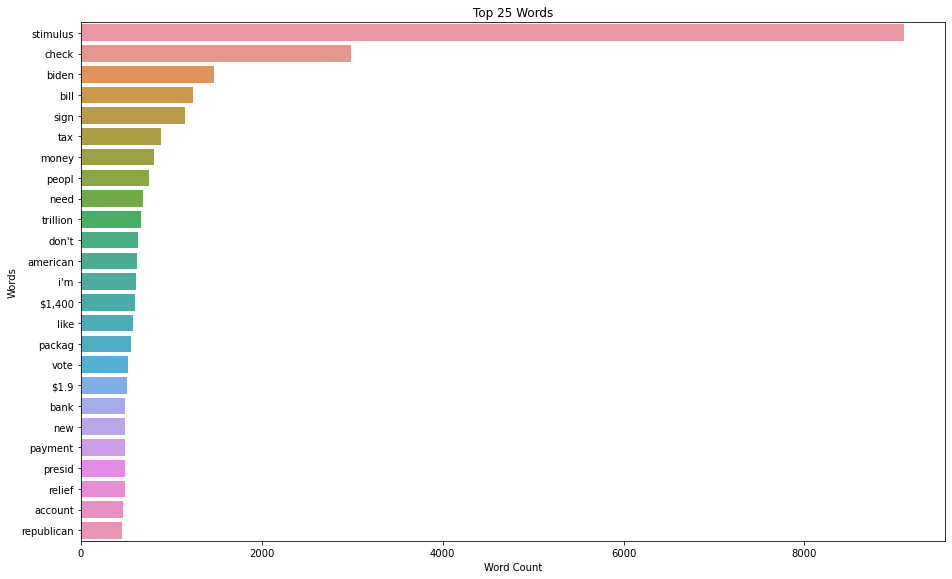

In [21]:
# Graph of top 25 words
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.8])
sns.barplot(x = top25.values, y = top25.index)
ax.set_title("Top 25 Words")
ax.set_xlabel("Word Count")
ax.set_ylabel("Words")
plt.show()

In [ ]:
# Create top mentions of organizations
orgStem = " ".join(cleanedWordList)

orgStem = nlp(orgStem)
label = [(i.text, i.label) for i in orgStem.ents]

dfOrgStemSeg1 = pd.DataFrame(label, columns = ['Word','Entity'])

dfOrgStemSeg2 = dfOrgStemSeg1.where(dfOrgStemSeg1["Entity"] == "ORG")

dfOrgStemCount = dfOrgStemSeg2['Word'].value_counts()

In [21]:
topOrgs = dfOrgStemCount[:20]
topOrgs

Series([], Name: Word, dtype: int64)

ValueError: min() arg is an empty sequence

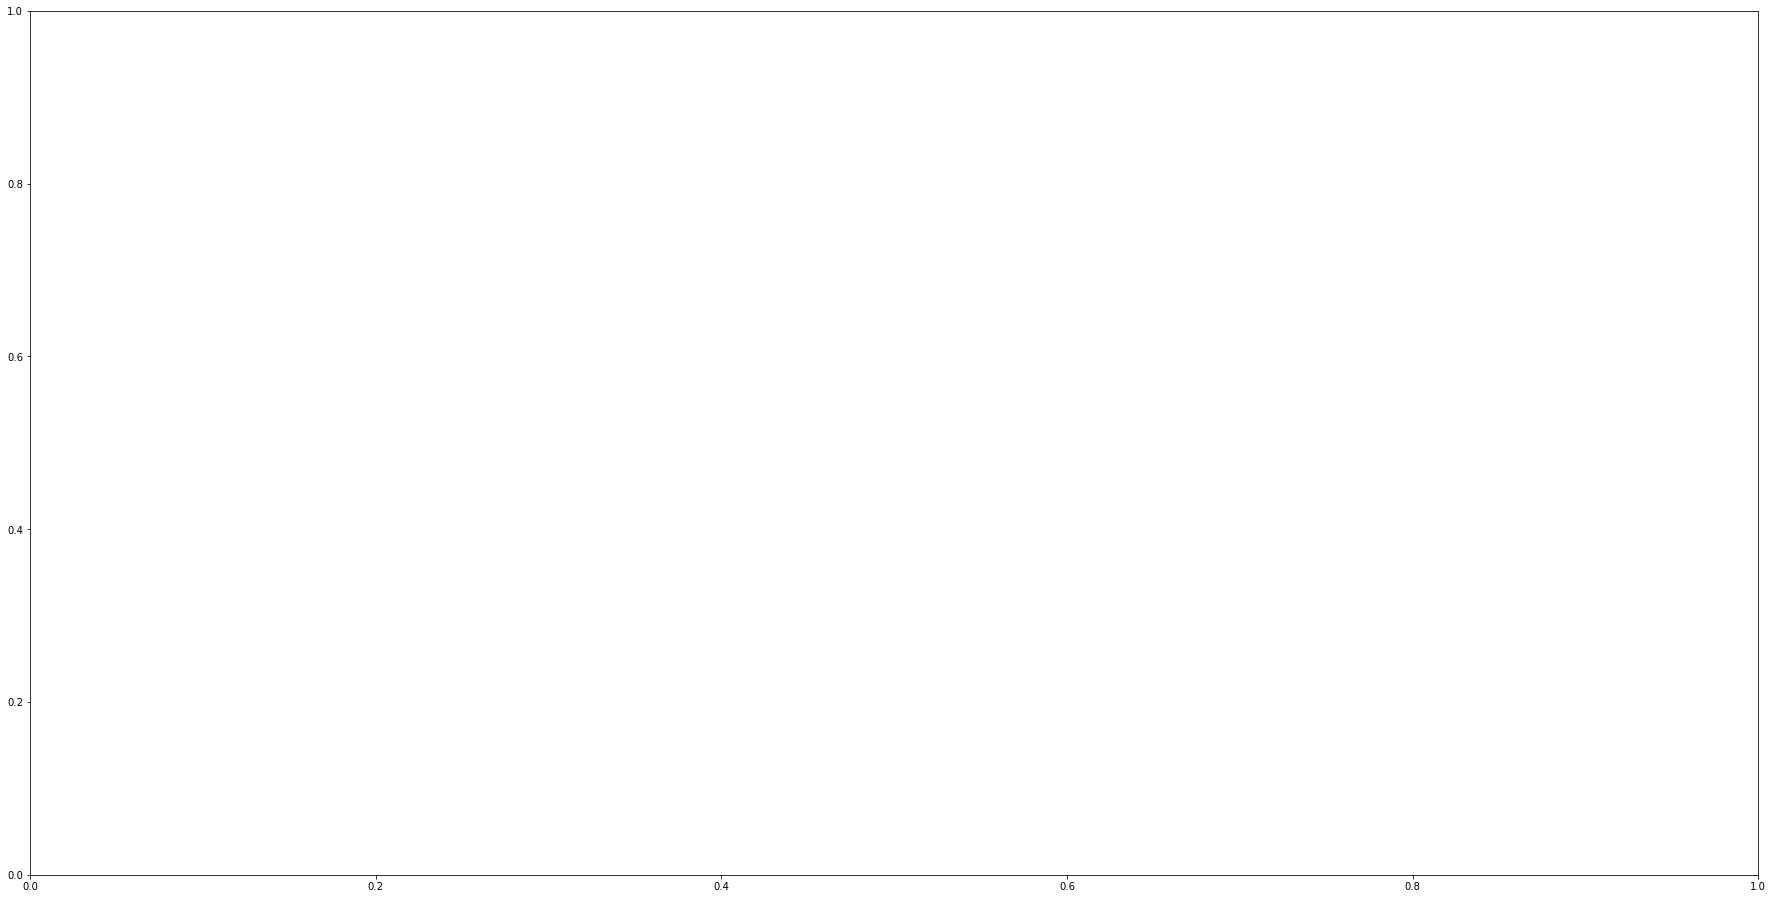

In [19]:
# Graph of top organizations
fig = plt.figure()
ax = fig.add_axes([0,0,4,3])
sns.barplot(x = topOrgs.values, y = topOrgs.index)
ax.set_title("Organizations")
ax.set_xlabel("Word Count")
ax.set_ylabel("Words")
plt.show()